# 대여소 선정

## 데이터 불러오기

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
import random
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skippin

In [2]:
df_bike_2021 = pd.read_csv('/content/drive/My Drive/공부/코드잇/프로젝트/초급 프로젝트/데이터/따릉이 이용정보(월별) 2021.csv', encoding='cp949')
df_bike_2022 = pd.read_csv('/content/drive/My Drive/공부/코드잇/프로젝트/초급 프로젝트/데이터/따릉이 이용정보(월별) 2022.csv', encoding='cp949')
df_bike_2023 = pd.read_csv('/content/drive/My Drive/공부/코드잇/프로젝트/초급 프로젝트/데이터/따릉이 이용정보(월별) 2023.csv', encoding='cp949')
df_bike_2024 = pd.read_csv('/content/drive/My Drive/공부/코드잇/프로젝트/초급 프로젝트/데이터/따릉이 이용정보(월별) 2024.csv', encoding='cp949')

print("2021년도",df_bike_2021.head(3))
print("2022년도",df_bike_2022.head(3))
print("2023년도",df_bike_2023.head(3))
print("2024년도",df_bike_2024.head(3))

<ipython-input-2-2a7f551c6f82>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_bike_2022 = pd.read_csv('/content/drive/My Drive/공부/코드잇/프로젝트/초급 프로젝트/데이터/따릉이 이용정보(월별) 2022.csv', encoding='cp949')


2021년도       대여일자  대여소번호  대여소명  대여구분코드 성별    연령대코드  이용건수     운동량   탄소량   이동거리(M)  \
0  2021-01      3  중랑센터  일일(회원)  M  AGE_003     2   47.68  0.40   1720.00   
1  2021-01      3  중랑센터      정기  M  AGE_003    11  578.98  2.87  12390.48   
2  2021-01      3  중랑센터      정기  M  AGE_004     1   81.65  0.53   2291.05   

   이용시간(분)  이용거리(M)  이용시간(본)  
0     25.0      NaN      NaN  
1    166.0      NaN      NaN  
2     13.0      NaN      NaN  
2022년도       대여일자  대여소번호  대여소명  대여구분코드  성별 연령대코드  이용건수     운동량   탄소량  이동거리(M)  \
0  2022-01      3  중랑센터  일일(회원)   M   50대     1    0.00  0.00     0.00   
1  2022-01      3  중랑센터      정기  \N   50대     3   62.44  0.51  2190.00   
2  2022-01      3  중랑센터      정기   M   40대     5  106.18  0.73  3154.57   

   이용시간(분)  
0       10  
1       24  
2       49  
2023년도      대여년월  대여소번호             대여소명 대여구분코드   성별 연령대코드  이용건수      운동량    탄소량  \
0  202301    102  102. 망원역 1번출구 앞    단체권    M  ~10대     4   463.12   4.61   
1  202301    102  102. 망원역 1번출구 앞    일일권  N

## 도중에 이름 바뀐 대여소명 적용 , 이용건수 숫자형으로 변경

In [3]:
dfs = [df_bike_2021, df_bike_2022, df_bike_2023, df_bike_2024]
mapping = {
    "뚝섬유원지역 1번출구 앞": "자양(뚝섬한강공원)역1번출구앞",
    "마포구민체육센터": "한강공원 망원나들목"
}


for df in dfs:
    df['이용건수'] = pd.to_numeric(df['이용건수'], errors='coerce').fillna(0).astype(int)
    df['대여소명'] = df['대여소명'].replace(mapping)

## 대여소명 앞에 숫자, ., 공백 제거

In [4]:
df_bike_2021['대여소명'] = df_bike_2021['대여소명'].str.replace(r'^\d+\.\s*', '', regex=True)
df_bike_2022['대여소명'] = df_bike_2022['대여소명'].str.replace(r'^\d+\.\s*', '', regex=True)
df_bike_2023['대여소명'] = df_bike_2023['대여소명'].str.replace(r'^\d+\.\s*', '', regex=True)
df_bike_2024['대여소명'] = df_bike_2024['대여소명'].str.replace(r'^\d+\.\s*', '', regex=True)

## 연도별 상위 10개 대여소 뽑아보기

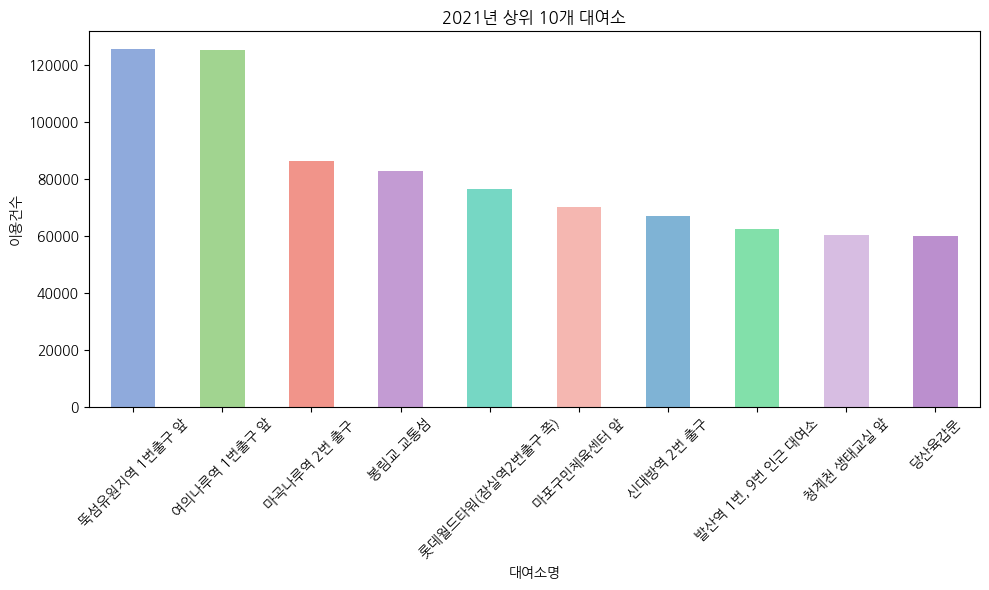

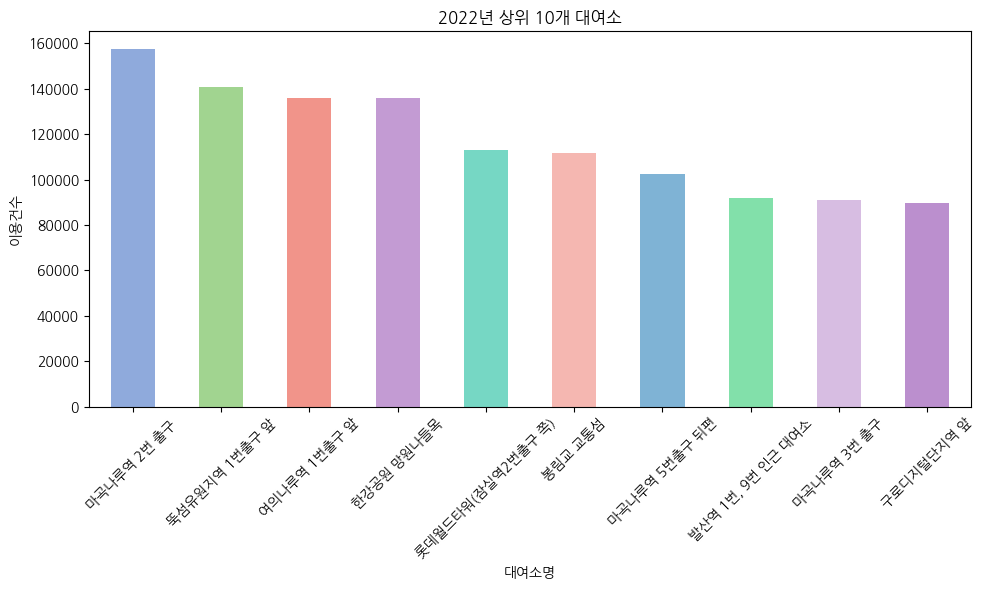

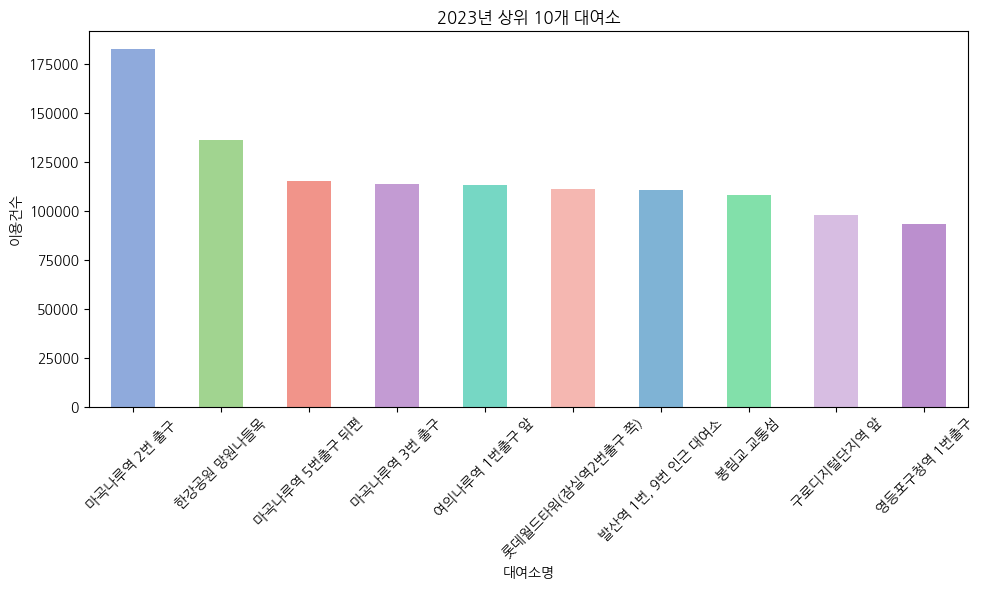

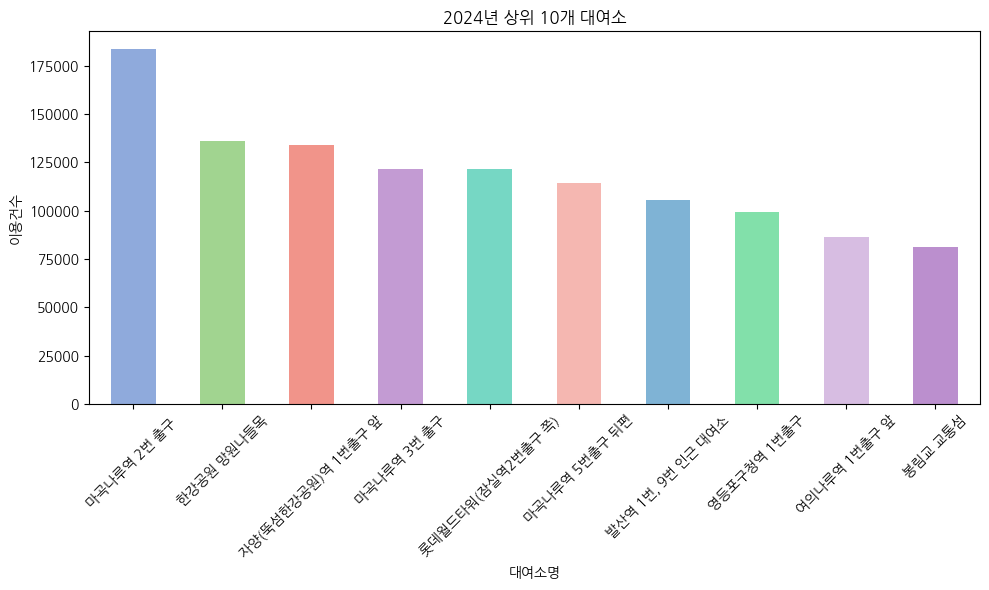

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

colors =[
    "#8FAADC",  # 블루
    "#A1D490",  # 그린
    "#F1948A",  # 레드
    "#C39BD3",  # 퍼플
    "#76D7C4",  # 청록
    "#F5B7B1",  # 핑크
    "#7FB3D5",  # 스카이 블루
    "#82E0AA",  # 민트
    "#D7BDE2",  # 라벤더
    "#BB8FCE"   # 바이올렛
]


# 2021년도
df_2021 = df_bike_2021[df_bike_2021['대여소명'] != 'Y']
top10_2021 = df_2021.groupby('대여소명')['이용건수'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top10_2021.plot(kind='bar', color=colors)
plt.title("2021년 상위 10개 대여소")
plt.xlabel("대여소명")
plt.ylabel("이용건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2022년도
df_2022 = df_bike_2022[df_bike_2022['대여소명'] != 'Y']
top10_2022 = df_2022.groupby('대여소명')['이용건수'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top10_2022.plot(kind='bar', color=colors)
plt.title("2022년 상위 10개 대여소")
plt.xlabel("대여소명")
plt.ylabel("이용건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2023년도
df_2023 = df_bike_2023[df_bike_2023['대여소명'] != 'Y']
top10_2023 = df_2023.groupby('대여소명')['이용건수'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top10_2023.plot(kind='bar', color=colors)
plt.title("2023년 상위 10개 대여소")
plt.xlabel("대여소명")
plt.ylabel("이용건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2024년도
df_2024 = df_bike_2024[df_bike_2024['대여소명'] != 'Y']
top10_2024 = df_2024.groupby('대여소명')['이용건수'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top10_2024.plot(kind='bar', color=colors)
plt.title("2024년 상위 10개 대여소")
plt.xlabel("대여소명")
plt.ylabel("이용건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



## 상위 10개 대여소 중 평균 이용건수 상위 5개 뽑기

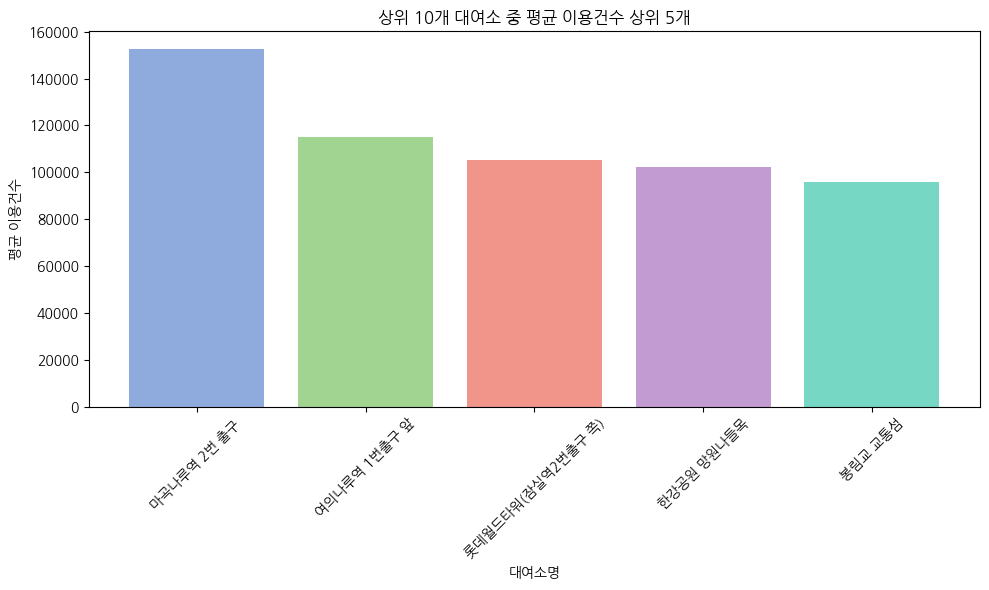

In [6]:
top10_df = pd.concat([
    top10_2021.rename('2021'),
    top10_2022.rename('2022'),
    top10_2023.rename('2023'),
    top10_2024.rename('2024')
], axis=1)

# Nan 0으로 특정 대여소가 상위 10에 없으면 Nan이 생기기 때문
top10_df = top10_df.fillna(0)

# 각 대여소의 평균 이용건수
top10_df['평균이용건수'] = top10_df.mean(axis=1)

# 평균 상위 5개 추출
top5_avg = top10_df.sort_values('평균이용건수', ascending=False).head(5)

plt.figure(figsize=(10,6))
plt.bar(top5_avg.index, top5_avg['평균이용건수'],color=colors)
plt.title("상위 10개 대여소 중 평균 이용건수 상위 5개")
plt.xlabel("대여소명")
plt.ylabel("평균 이용건수")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 데이터 전처리

In [7]:
df_bike_24 = pd.read_csv('/content/drive/My Drive/공부/코드잇/프로젝트/초급 프로젝트/데이터/따릉이 대여이력 정보 2024.csv', encoding="cp949")


In [8]:
df_bike_24.head(5)

,대여일시,대여소명,반납일시,반납대여소명,이용시간(분),이용거리(M),성별,나이
0,2024-01-01 00:04:10,동서울농협 앞,2024-01-01 00:05:13,상봉역 3번출구,1.0,0.00,남성,22.0
1,2024-01-01 00:03:13,군자역 7번출구 베스트샵 앞,2024-01-01 00:06:33,세종사이버대학교,3.0,642.13,여성,20.0
2,2024-01-01 00:03:02,동묘앞역 6번출구,2024-01-01 00:07:33,맥스타일 앞,4.0,791.08,남성,29.0
3,2024-01-01 00:06:16,샛강역 1번출구 앞,2024-01-01 00:07:35,샛강역 1번출구 앞,1.0,20.00,남성,33.0
4,2024-01-01 00:00:50,삼호아파트 앞,2024-01-01 00:08:09,오류동역 2번출구,7.0,1227.24,여성,18.0


In [9]:
df_bike_24.isnull().sum()

,0
대여일시,0
대여소명,0
반납일시,0
반납대여소명,0
이용시간(분),0
이용거리(M),0
성별,0
나이,0


In [10]:
bins = [0, 20, 40, 60, np.inf]
labels = ["~10대", "20-30대", "40-50대", "60대이상"]

df_bike_24['연령대'] = pd.cut(df_bike_24['나이'], bins=bins, labels=labels, right=False)

In [11]:
names = ["마곡나루역 2번 출구", "여의나루역 1번출구 앞", "롯데월드타워(잠실역2번출구 쪽)"]
mask = df_bike_24['대여소명'].isin(names) | df_bike_24['반납대여소명'].isin(names)
df_bike_24 = df_bike_24[mask]

In [12]:
df_bike_24

,대여일시,대여소명,반납일시,반납대여소명,이용시간(분),이용거리(M),성별,나이,연령대
96,2024-01-01 00:19:04,마곡나루역 2번 출구,2024-01-01 00:20:26,마곡나루역 2번 출구,1.0,10.00,여성,26.0,20-30대
207,2024-01-01 00:22:25,방화사거리 마을버스 버스정류장,2024-01-01 00:31:35,마곡나루역 2번 출구,9.0,2100.00,남성,22.0,20-30대
225,2024-01-01 00:16:39,여의나루역 1번출구 앞,2024-01-01 00:33:05,어울림병원 앞,16.0,2340.00,남성,33.0,20-30대
235,2024-01-01 00:19:01,마곡나루역 2번 출구,2024-01-01 00:33:51,마곡13단지힐스테이트마스터 후문(1320동 앞),14.0,1630.90,남성,33.0,20-30대
237,2024-01-01 00:21:40,마곡나루역 2번 출구,2024-01-01 00:33:57,마곡13단지힐스테이트마스터 후문(1320동 앞),12.0,1661.60,여성,26.0,20-30대
...,...,...,...,...,...,...,...,...,...
28675191,2024-12-31 23:07:49,신목동역 2번 출구,2024-12-31 23:57:53,여의나루역 1번출구 앞,50.0,8640.00,여성,17.0,~10대
28675195,2024-12-31 23:42:43,롯데월드타워(잠실역2번출구 쪽),2024-12-31 23:58:06,석촌호수 서호 남단,15.0,1160.26,남성,31.0,20-30대
28675206,2024-12-31 23:53:03,LG사이언스파크 E7동,2024-12-31 23:58:49,마곡나루역 2번 출구,5.0,1104.97,남성,18.0,~10대
28675305,2024-12-31 23:55:54,마곡메가박스 앞,2025-01-01 00:10:41,마곡나루역 2번 출구,14.0,1479.75,남성,19.0,~10대


In [13]:
# 75세 이상인 행의 개수
count_75 = df_bike_24[df_bike_24['나이'] >= 75].shape[0]
# 14세 이하인 행의 개수
count_14 = df_bike_24[df_bike_24['나이'] <= 14].shape[0]

print("75세 이상:", count_75)
print("14세 이하:", count_14)


75세 이상: 942
14세 이하: 1513


In [14]:
# 이용시간(분)의 최대값을 가진 행
max_time_row = df_bike_24[df_bike_24['이용시간(분)'] == df_bike_24['이용시간(분)'].max()]

# 이용거리(M)의 최대값을 가진 행
max_distance_row = df_bike_24[df_bike_24['이용거리(M)'] == df_bike_24['이용거리(M)'].max()]

# 나이의 최대값을 가진 행
max_age_row = df_bike_24[df_bike_24['나이'] == df_bike_24['나이'].max()]

# 결과 출력 (Colab에서 보기 쉽게)
print("최대 이용시간 행")
display(max_time_row)

print("\n최대 이용거리 행")
display(max_distance_row)

print("\n최대 나이 행")
display(max_age_row)

최대 이용시간 행


,대여일시,대여소명,반납일시,반납대여소명,이용시간(분),이용거리(M),성별,나이,연령대
10234341,2024-05-21 15:51:56,롯데월드타워(잠실역2번출구 쪽),2024-05-22 19:28:14,가락시장역 3번 출구,1656.0,10113.85,남성,30.0,20-30대



최대 이용거리 행


,대여일시,대여소명,반납일시,반납대여소명,이용시간(분),이용거리(M),성별,나이,연령대
726317,2024-01-16 08:23:53,여의나루역 1번출구 앞,2024-01-18 13:05:36,\N,870.0,128581.0,여성,28.0,20-30대



최대 나이 행


,대여일시,대여소명,반납일시,반납대여소명,이용시간(분),이용거리(M),성별,나이,연령대
583823,2024-01-13 13:44:02,여의나루역 1번출구 앞,2024-01-13 15:36:38,당산육갑문,112.0,2649.46,남성,2024.0,60대이상
586653,2024-01-13 15:37:17,당산육갑문,2024-01-13 16:29:07,여의나루역 1번출구 앞,51.0,2649.46,남성,2024.0,60대이상
4839658,2024-03-30 22:20:09,KT앞,2024-03-30 22:59:14,여의나루역 1번출구 앞,39.0,4114.76,남성,2024.0,60대이상
5556241,2024-04-06 15:52:14,여의나루역 1번출구 앞,2024-04-06 17:05:43,LG트윈타워 앞,73.0,4670.00,남성,2024.0,60대이상
8141406,2024-05-01 12:22:46,여의나루역 1번출구 앞,2024-05-01 12:47:15,샛강생태공원방문자센터 앞,24.0,2562.28,남성,2024.0,60대이상
17933374,2024-08-09 20:44:28,여의나루역 1번출구 앞,2024-08-09 21:50:07,산업은행 앞,65.0,1009.40,남성,2024.0,60대이상
21115313,2024-09-18 16:05:17,여의나루역 1번출구 앞,2024-09-18 16:09:52,여의나루역 1번출구 앞,4.0,35.51,남성,2024.0,60대이상
21120793,2024-09-18 16:10:48,여의나루역 1번출구 앞,2024-09-18 17:33:55,여의나루역 1번출구 앞,83.0,10930.00,남성,2024.0,60대이상
25023741,2024-10-30 18:47:38,여의도 삼부아파트,2024-10-30 19:04:31,여의나루역 1번출구 앞,16.0,1757.41,남성,2024.0,60대이상
25035217,2024-10-30 20:39:33,여의나루역 1번출구 앞,2024-10-30 20:46:43,진주아파트상가 앞,7.0,1110.00,남성,2024.0,60대이상


In [15]:
# IQR을 이용한 이상치 탐지 함수
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# 이용시간(분)과 이용거리(M)의 IQR 기반 이상치 탐지 X
outliers_time = detect_outliers_iqr(df_bike_24, '이용시간(분)')
outliers_distance = detect_outliers_iqr(df_bike_24, '이용거리(M)')

# 추가적인 논리적 기준 적용 (이동거리 50km 이상, 이용시간 10시간 이상)
extreme_outliers_time = df_bike_24[df_bike_24['이용시간(분)'] > 600]  # 10시간 초과
extreme_outliers_distance = df_bike_24[df_bike_24['이용거리(M)'] > 50000]  # 50km 초과

# 이상치 개수 확인
print(f"IQR 기반 이용시간 이상치 개수: {len(outliers_time)}")
print(f"IQR 기반 이용거리 이상치 개수: {len(outliers_distance)}")
print(f"10시간 초과 이용시간 이상치 개수: {len(extreme_outliers_time)}")
print(f"50km 초과 이용거리 이상치 개수: {len(extreme_outliers_distance)}")

# 이상치 데이터 샘플 출력 (상위 5개만)
print("\n ==================IQR 기반 이용시간 이상치 샘플==================")
display(outliers_time.head())

print("\n ==================IQR 기반 이용거리 이상치 샘플==================")
display(outliers_distance.head())

print("\n ==================10시간 초과 이용시간 이상치 샘플==================")
display(extreme_outliers_time.head())

print("\n ==================50km 초과 이용거리 이상치 샘플==================")
display(extreme_outliers_distance.head())

IQR 기반 이용시간 이상치 개수: 59916
IQR 기반 이용거리 이상치 개수: 60074
10시간 초과 이용시간 이상치 개수: 39
50km 초과 이용거리 이상치 개수: 15

 ==================IQR 기반 이용시간 이상치 샘플==================


,대여일시,대여소명,반납일시,반납대여소명,이용시간(분),이용거리(M),성별,나이,연령대
3085,2024-01-01 02:34:45,여의나루역 1번출구 앞,2024-01-01 03:28:20,서울시 도로환경관리센터,53.0,4891.32,남성,17.0,~10대
3088,2024-01-01 02:33:41,여의나루역 1번출구 앞,2024-01-01 03:28:26,서울시 도로환경관리센터,54.0,10464.56,남성,17.0,~10대
4171,2024-01-01 04:42:58,홍대입구역 6번출구,2024-01-01 05:30:55,여의나루역 1번출구 앞,47.0,5080.00,남성,19.0,~10대
4336,2024-01-01 04:54:52,국회6문,2024-01-01 05:50:18,여의나루역 1번출구 앞,55.0,1370.00,남성,20.0,20-30대
4386,2024-01-01 04:54:58,국회6문,2024-01-01 05:54:38,여의나루역 1번출구 앞,60.0,1643.13,남성,20.0,20-30대



 ==================IQR 기반 이용거리 이상치 샘플==================


,대여일시,대여소명,반납일시,반납대여소명,이용시간(분),이용거리(M),성별,나이,연령대
238,2024-01-01 00:05:43,마곡나루역 2번 출구,2024-01-01 00:34:00,성보하이드로빌딩,28.0,4702.03,남성,23.0,20-30대
1686,2024-01-01 01:24:22,여의나루역 1번출구 앞,2024-01-01 02:01:41,신길역 2번출구,37.0,5193.47,남성,24.0,20-30대
3085,2024-01-01 02:34:45,여의나루역 1번출구 앞,2024-01-01 03:28:20,서울시 도로환경관리센터,53.0,4891.32,남성,17.0,~10대
3088,2024-01-01 02:33:41,여의나루역 1번출구 앞,2024-01-01 03:28:26,서울시 도로환경관리센터,54.0,10464.56,남성,17.0,~10대
4171,2024-01-01 04:42:58,홍대입구역 6번출구,2024-01-01 05:30:55,여의나루역 1번출구 앞,47.0,5080.00,남성,19.0,~10대



 ==================10시간 초과 이용시간 이상치 샘플==================


,대여일시,대여소명,반납일시,반납대여소명,이용시간(분),이용거리(M),성별,나이,연령대
726317,2024-01-16 08:23:53,여의나루역 1번출구 앞,2024-01-18 13:05:36,\N,870.0,128581.00,여성,28.0,20-30대
983166,2024-01-23 22:19:46,마곡나루역 2번 출구,2024-01-24 08:31:44,"마곡역 버스정류장(마곡나루역1번출구, 웰튼병원 방면)",612.0,744.30,남성,30.0,20-30대
2254274,2024-02-18 14:00:28,롯데월드타워(잠실역2번출구 쪽),2024-02-20 13:03:52,\N,870.0,2468.00,여성,15.0,~10대
2473214,2024-02-25 17:41:33,여의나루역 1번출구 앞,2024-02-26 10:07:09,LG트윈타워 앞,985.0,11748.50,남성,64.0,60대이상
4259783,2024-03-22 20:05:00,마곡나루역 2번 출구,2024-03-23 07:54:39,마곡13단지 정문 앞,709.0,1255.16,남성,39.0,20-30대



 ==================50km 초과 이용거리 이상치 샘플==================


,대여일시,대여소명,반납일시,반납대여소명,이용시간(분),이용거리(M),성별,나이,연령대
726317,2024-01-16 08:23:53,여의나루역 1번출구 앞,2024-01-18 13:05:36,\N,870.0,128581.00,여성,28.0,20-30대
5705518,2024-04-07 20:04:50,여의나루역 1번출구 앞,2024-04-10 13:04:20,\N,870.0,57468.00,남성,15.0,~10대
7274526,2024-04-23 16:08:52,마곡나루역 2번 출구,2024-04-23 16:21:19,신방화사거리,12.0,57267.39,여성,18.0,~10대
9846041,2024-05-18 18:02:28,여의나루역 1번출구 앞,2024-05-18 19:53:55,잠실나루 나들목,111.0,118528.15,여성,40.0,40-50대
10364469,2024-05-22 22:22:47,여의나루역 1번출구 앞,2024-05-23 00:20:15,금천현대홈타운 후문 서부샛길,117.0,62930.00,남성,19.0,~10대


In [16]:
# 10시간(600분) 초과 & 50km(50000m) 초과 데이터 제거
df_bike_24 = df_bike_24[(df_bike_24['이용시간(분)'] > 0) & (df_bike_24['이용시간(분)'] <= 600) & (df_bike_24['이용거리(M)'] <= 50000)]

# 제거 후 데이터 크기 확인
print(f"✅ 이상치 제거 후 데이터 크기: {df_bike_24.shape}")

✅ 이상치 제거 후 데이터 크기: (469218, 9)


In [17]:
# df_bike_24.to_csv('/content/drive/My Drive/공부/코드잇/프로젝트/초급 프로젝트/데이터/마곡잠실여의모으기.csv', index=False, encoding='cp949')


# 분석 시각화

## **데이터 불러오기**

In [18]:
df = pd.read_csv('/content/drive/My Drive/공부/코드잇/프로젝트/초급 프로젝트/데이터/마곡잠실여의모으기.csv',encoding='cp949')

## **대여일시, 반납일시 날짜형으로 변경, 요일, 월 컬럼 생성**

In [19]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'])
df['요일'] = df['대여일시'].dt.day_name()
day_name_mapping = {
    "Monday": "월",
    "Tuesday": "화",
    "Wednesday": "수",
    "Thursday": "목",
    "Friday": "금",
    "Saturday": "토",
    "Sunday": "일"
}

df['요일'] = df['대여일시'].dt.day_name().map(day_name_mapping)
df['대여월'] = pd.to_datetime(df['대여일시']).dt.month
df['반납월'] = df['반납일시'].dt.month
df.head()

,대여일시,대여소명,반납일시,반납대여소명,이용시간(분),이용거리(M),성별,나이,연령대,요일,대여월,반납월
0,2024-01-01 00:19:04,마곡나루역 2번 출구,2024-01-01 00:20:26,마곡나루역 2번 출구,1.0,10.0,여성,26.0,20-30대,월,1,1
1,2024-01-01 00:22:25,방화사거리 마을버스 버스정류장,2024-01-01 00:31:35,마곡나루역 2번 출구,9.0,2100.0,남성,22.0,20-30대,월,1,1
2,2024-01-01 00:16:39,여의나루역 1번출구 앞,2024-01-01 00:33:05,어울림병원 앞,16.0,2340.0,남성,33.0,20-30대,월,1,1
3,2024-01-01 00:19:01,마곡나루역 2번 출구,2024-01-01 00:33:51,마곡13단지힐스테이트마스터 후문(1320동 앞),14.0,1630.9,남성,33.0,20-30대,월,1,1
4,2024-01-01 00:21:40,마곡나루역 2번 출구,2024-01-01 00:33:57,마곡13단지힐스테이트마스터 후문(1320동 앞),12.0,1661.6,여성,26.0,20-30대,월,1,1


## **대여소별로 나누기**

In [20]:
# 마곡나루역 2번 출구
df_magok = df[(df['대여소명'] == '마곡나루역 2번 출구') | (df['반납대여소명'] == '마곡나루역 2번 출구')]

# 여의나루역 1번출구 앞
df_yeoui = df[(df['대여소명'] == '여의나루역 1번출구 앞') | (df['반납대여소명'] == '여의나루역 1번출구 앞')]

# 롯데월드타워(잠실역2번출구 쪽)
df_jamsil = df[(df['대여소명'] == '롯데월드타워(잠실역2번출구 쪽)') | (df['반납대여소명'] == '롯데월드타워(잠실역2번출구 쪽)')]


In [21]:
df.head(5)

,대여일시,대여소명,반납일시,반납대여소명,이용시간(분),이용거리(M),성별,나이,연령대,요일,대여월,반납월
0,2024-01-01 00:19:04,마곡나루역 2번 출구,2024-01-01 00:20:26,마곡나루역 2번 출구,1.0,10.0,여성,26.0,20-30대,월,1,1
1,2024-01-01 00:22:25,방화사거리 마을버스 버스정류장,2024-01-01 00:31:35,마곡나루역 2번 출구,9.0,2100.0,남성,22.0,20-30대,월,1,1
2,2024-01-01 00:16:39,여의나루역 1번출구 앞,2024-01-01 00:33:05,어울림병원 앞,16.0,2340.0,남성,33.0,20-30대,월,1,1
3,2024-01-01 00:19:01,마곡나루역 2번 출구,2024-01-01 00:33:51,마곡13단지힐스테이트마스터 후문(1320동 앞),14.0,1630.9,남성,33.0,20-30대,월,1,1
4,2024-01-01 00:21:40,마곡나루역 2번 출구,2024-01-01 00:33:57,마곡13단지힐스테이트마스터 후문(1320동 앞),12.0,1661.6,여성,26.0,20-30대,월,1,1


## **대여소별 성별 비율**

### **색 팔레트 만들기**

In [22]:
pastel_colors = [
    "#30E291",
    "#425563",
    "#3498DB",
    "#FF6B6B",
    "#00C73C",
    "#AED6F1",
    "#F8C471",
    "#D7DBDD",
    "#ABEBC6",
    "#F9C9CA",
    "#9FA8DA"
]


In [23]:
age_order = ["~10대", "20-30대", "40-50대", "60대이상"]

age_color = {
    "~10대": pastel_colors[2],
    "20-30대": pastel_colors[0],
    "40-50대": pastel_colors[3],  #
    "60대이상": pastel_colors[1]
}


In [24]:
gender_colors = {
    "남성": pastel_colors[0],
    "여성": pastel_colors[3]
}


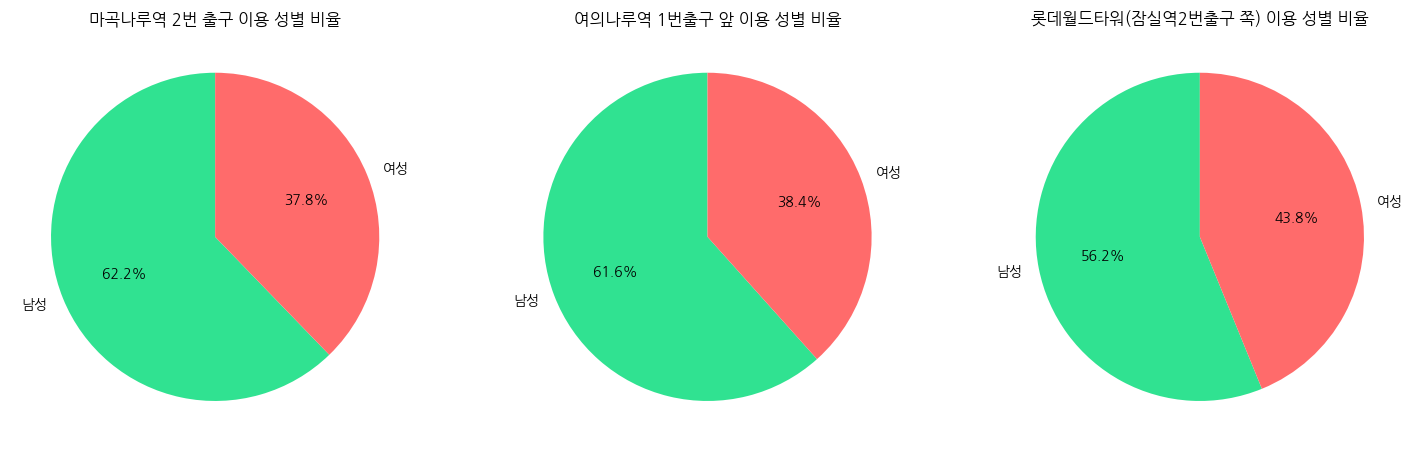

In [25]:
def plot_gender_subplots(dfs, names):
    fig, axes = plt.subplots(1, len(dfs), figsize=(18,6))

    for ax, df_station, station_name in zip(axes, dfs, names):
        df_gender = df_station[df_station['성별'].isin(['남성', '여성'])]
        gender_counts = df_gender['성별'].value_counts()

        labels = gender_counts.index.tolist()
        sizes = gender_counts.values

        colors_for_gender = [gender_colors[label] for label in labels]

        ax.pie(sizes, labels=labels, colors=colors_for_gender, autopct='%1.1f%%', startangle=90)
        ax.set_title(f"{station_name} 이용 성별 비율")

    plt.show()

plot_gender_subplots(
    [df_magok, df_yeoui, df_jamsil],
    ["마곡나루역 2번 출구", "여의나루역 1번출구 앞", "롯데월드타워(잠실역2번출구 쪽)"]
)

## **연령대별 대여소 이용건수**

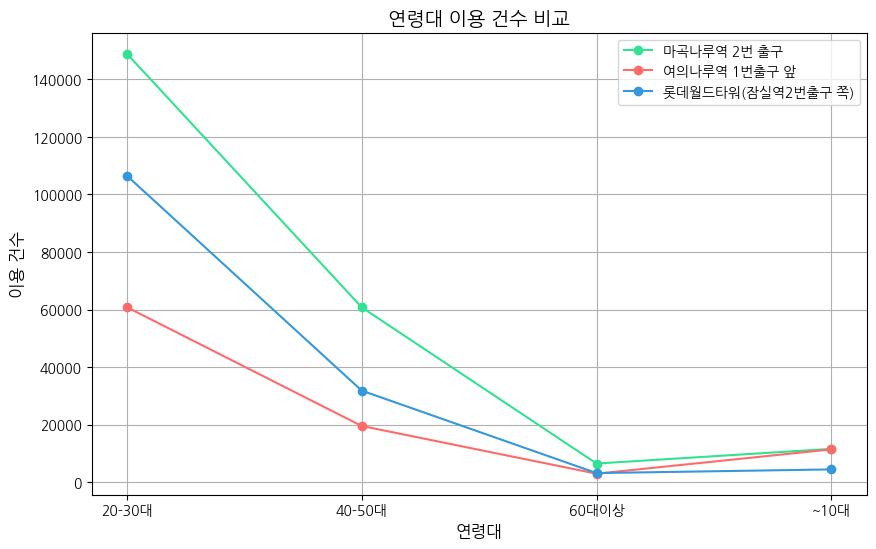

In [26]:
all_age_groups = sorted(
    set(df_magok['연령대'].dropna().unique())
    | set(df_yeoui['연령대'].dropna().unique())
    | set(df_jamsil['연령대'].dropna().unique())
)

counts_magok = df_magok['연령대'].value_counts().reindex(all_age_groups, fill_value=0)
counts_yeoui = df_yeoui['연령대'].value_counts().reindex(all_age_groups, fill_value=0)
counts_jamsil = df_jamsil['연령대'].value_counts().reindex(all_age_groups, fill_value=0)

plt.figure(figsize=(10,6))
plt.plot(all_age_groups, counts_magok, marker='o', color=pastel_colors[0], label="마곡나루역 2번 출구")
plt.plot(all_age_groups, counts_yeoui, marker='o', color=pastel_colors[3], label="여의나루역 1번출구 앞")
plt.plot(all_age_groups, counts_jamsil, marker='o', color=pastel_colors[2], label="롯데월드타워(잠실역2번출구 쪽)")

plt.title("연령대 이용 건수 비교", fontsize=14)
plt.xlabel("연령대", fontsize=12)
plt.ylabel("이용 건수", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()

## 대여소별 월별 이용건수

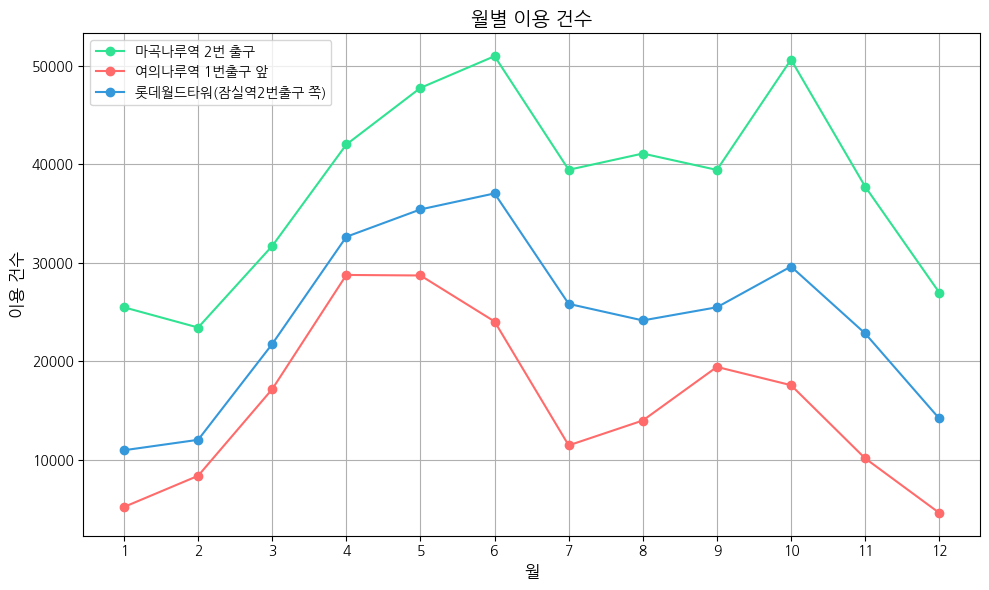

In [27]:
# 마곡나루
df_rental_magok = df_magok[['대여월']].dropna().copy()
df_rental_magok = df_rental_magok.rename(columns={'대여월': '월'})

df_return_magok = df_magok[['반납월']].dropna().copy()
df_return_magok = df_return_magok.rename(columns={'반납월': '월'})

df_combined_magok = pd.concat([df_rental_magok, df_return_magok])
monthly_counts_magok = df_combined_magok['월'].value_counts().reindex(range(1,13), fill_value=0)

# 여의나루역 1번출구 앞
df_rental_yeoui = df_yeoui[['대여월']].dropna().copy()
df_rental_yeoui = df_rental_yeoui.rename(columns={'대여월': '월'})

df_return_yeoui = df_yeoui[['반납월']].dropna().copy()
df_return_yeoui = df_return_yeoui.rename(columns={'반납월': '월'})

df_combined_yeoui = pd.concat([df_rental_yeoui, df_return_yeoui])
monthly_counts_yeoui = df_combined_yeoui['월'].value_counts().reindex(range(1,13), fill_value=0)

# 롯데월드타워(잠실역2번출구 쪽)
df_rental_jamsil = df_jamsil[['대여월']].dropna().copy()
df_rental_jamsil = df_rental_jamsil.rename(columns={'대여월': '월'})

df_return_jamsil = df_jamsil[['반납월']].dropna().copy()
df_return_jamsil = df_return_jamsil.rename(columns={'반납월': '월'})

df_combined_jamsil = pd.concat([df_rental_jamsil, df_return_jamsil])
monthly_counts_jamsil = df_combined_jamsil['월'].value_counts().reindex(range(1,13), fill_value=0)

plt.figure(figsize=(10,6))
plt.plot(range(1,13), monthly_counts_magok, marker='o', label="마곡나루역 2번 출구", color=pastel_colors[0])
plt.plot(range(1,13), monthly_counts_yeoui, marker='o', label="여의나루역 1번출구 앞", color=pastel_colors[3])
plt.plot(range(1,13), monthly_counts_jamsil, marker='o', label="롯데월드타워(잠실역2번출구 쪽)", color=pastel_colors[2])

plt.title("월별 이용 건수", fontsize=14)
plt.xlabel("월", fontsize=12)
plt.ylabel("이용 건수", fontsize=12)
plt.xticks(range(1,13))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## **대여소별 월별 성별 이용건수**

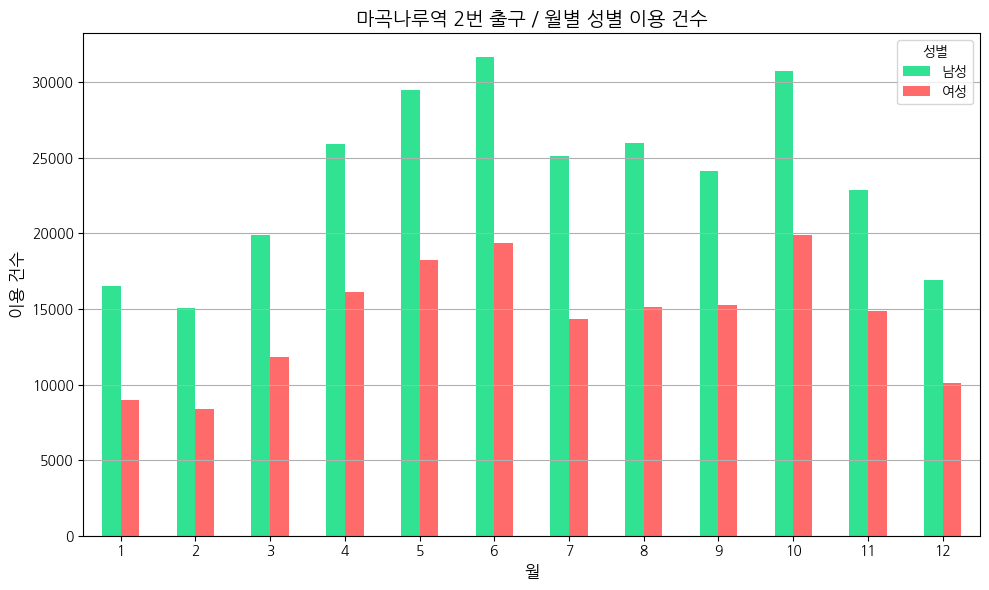

In [28]:
df_rental = df_magok[['대여월', '성별']].dropna(subset=['대여월']).copy()
df_rental = df_rental.rename(columns={'대여월': '월'})

df_return = df_magok[['반납월', '성별']].dropna(subset=['반납월']).copy()
df_return = df_return.rename(columns={'반납월': '월'})

df_combined = pd.concat([df_rental, df_return])

grouped = df_combined.groupby(['월', '성별']).size().reset_index(name='이용건수')

pivot = grouped.pivot(index='월', columns='성별', values='이용건수').fillna(0)
pivot = pivot.reindex(range(1, 13), fill_value=0)

ax = pivot.plot(kind='bar', figsize=(10, 6),
                color = [gender_colors[col] for col in pivot.columns])

ax.set_title("마곡나루역 2번 출구 / 월별 성별 이용 건수", fontsize=14)
ax.set_xlabel("월", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)

plt.xticks(range(0, 12), range(1, 13), rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

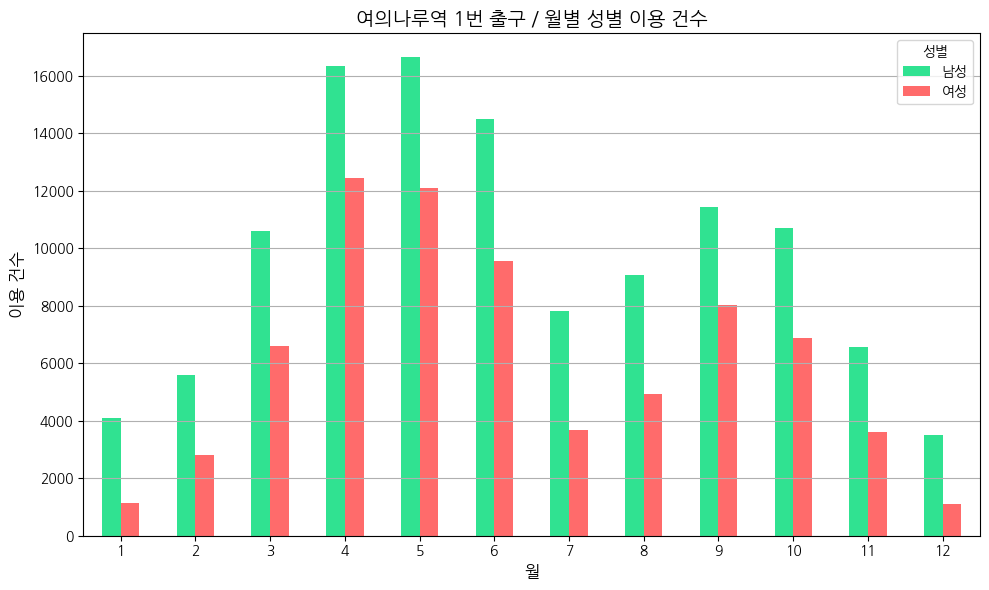

In [29]:
df_rental = df_yeoui[['대여월', '성별']].dropna(subset=['대여월']).copy()
df_rental = df_rental.rename(columns={'대여월': '월'})

df_return = df_yeoui[['반납월', '성별']].dropna(subset=['반납월']).copy()
df_return = df_return.rename(columns={'반납월': '월'})

df_combined = pd.concat([df_rental, df_return])

grouped = df_combined.groupby(['월', '성별']).size().reset_index(name='이용건수')

pivot = grouped.pivot(index='월', columns='성별', values='이용건수').fillna(0)
pivot = pivot.reindex(range(1, 13), fill_value=0)

ax = pivot.plot(kind='bar', figsize=(10, 6),
                color=[gender_colors[col] for col in pivot.columns])

ax.set_title("여의나루역 1번 출구 / 월별 성별 이용 건수", fontsize=14)
ax.set_xlabel("월", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)

plt.xticks(range(0, 12), range(1, 13), rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

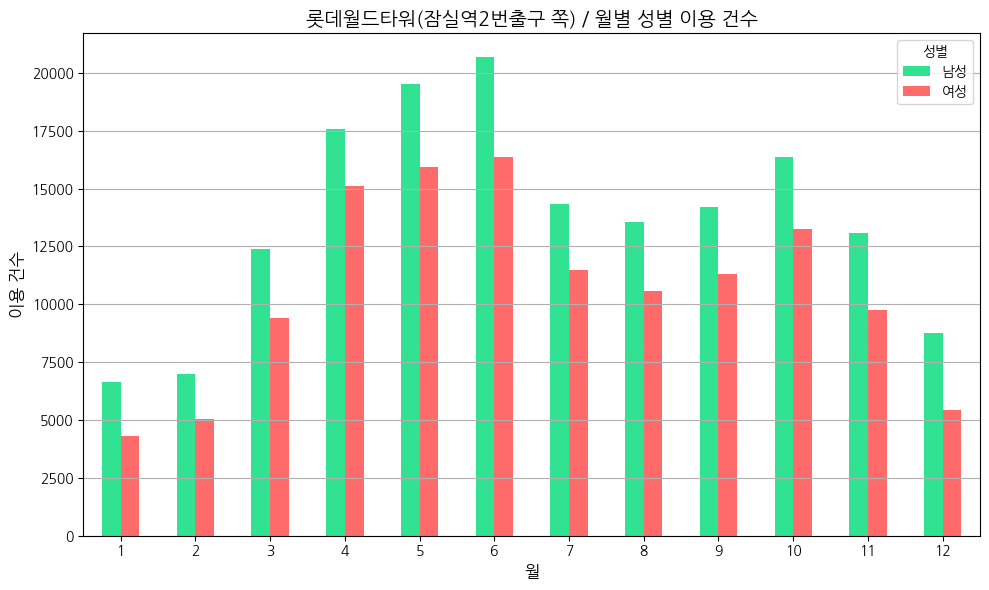

In [30]:
df_rental = df_jamsil[['대여월', '성별']].dropna(subset=['대여월']).copy()
df_rental = df_rental.rename(columns={'대여월': '월'})

df_return = df_jamsil[['반납월', '성별']].dropna(subset=['반납월']).copy()
df_return = df_return.rename(columns={'반납월': '월'})

df_combined = pd.concat([df_rental, df_return])

grouped = df_combined.groupby(['월', '성별']).size().reset_index(name='이용건수')

pivot = grouped.pivot(index='월', columns='성별', values='이용건수').fillna(0)
pivot = pivot.reindex(range(1, 13), fill_value=0)

ax = pivot.plot(kind='bar', figsize=(10, 6),
                color=[gender_colors[col] for col in pivot.columns])

ax.set_title("롯데월드타워(잠실역2번출구 쪽) / 월별 성별 이용 건수", fontsize=14)
ax.set_xlabel("월", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)

plt.xticks(range(0, 12), range(1, 13), rotation=0)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## **대여소별 월별 연령대 이용건수**

<Figure size 1000x600 with 0 Axes>

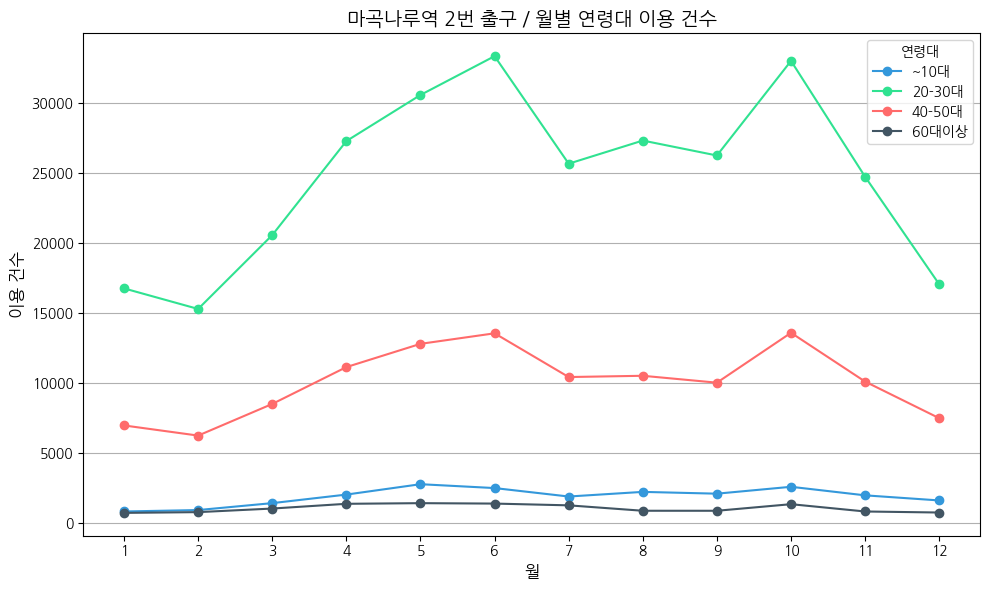

In [31]:
df_rental = df_magok[['대여월', '연령대']].dropna(subset=['대여월']).copy()
df_rental = df_rental.rename(columns={'대여월': '월'})


df_return = df_magok[['반납월', '연령대']].dropna(subset=['반납월']).copy()
df_return = df_return.rename(columns={'반납월': '월'})

df_combined = pd.concat([df_rental, df_return])

grouped = df_combined.groupby(['월', '연령대']).size().reset_index(name='이용건수')

pivot = grouped.pivot(index='월', columns='연령대', values='이용건수').fillna(0)
pivot = pivot.reindex(range(1, 13), fill_value=0)

pivot = pivot.reindex(columns=age_order, fill_value=0)

colors = [age_color[age] for age in age_order]

plt.figure(figsize=(10,6))
ax = pivot.plot(kind='line', marker='o', figsize=(10,6), color=colors)
ax.set_title("마곡나루역 2번 출구 / 월별 연령대 이용 건수", fontsize=14)
ax.set_xlabel("월", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title="연령대")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

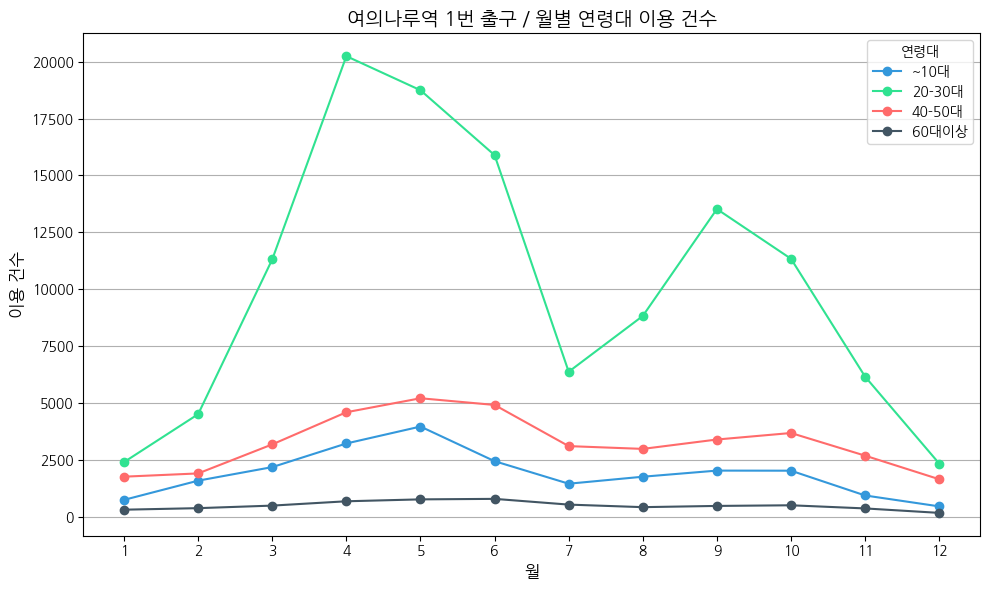

In [32]:
df_rental = df_yeoui[['대여월', '연령대']].dropna(subset=['대여월']).copy()
df_rental = df_rental.rename(columns={'대여월': '월'})


df_return = df_yeoui[['반납월', '연령대']].dropna(subset=['반납월']).copy()
df_return = df_return.rename(columns={'반납월': '월'})

df_combined = pd.concat([df_rental, df_return])

grouped = df_combined.groupby(['월', '연령대']).size().reset_index(name='이용건수')

pivot = grouped.pivot(index='월', columns='연령대', values='이용건수').fillna(0)
pivot = pivot.reindex(range(1, 13), fill_value=0)

pivot = pivot.reindex(columns=age_order, fill_value=0)

colors = [age_color[age] for age in age_order]

plt.figure(figsize=(10,6))
ax = pivot.plot(kind='line', marker='o', figsize=(10,6), color=colors)
ax.set_title("여의나루역 1번 출구 / 월별 연령대 이용 건수", fontsize=14)
ax.set_xlabel("월", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title="연령대")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

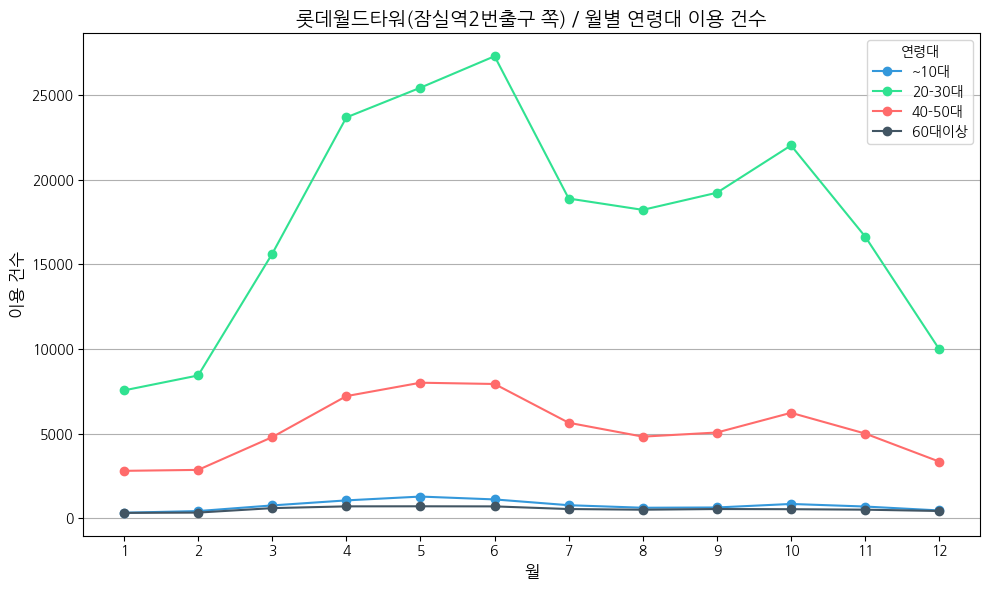

In [33]:
df_rental = df_jamsil[['대여월', '연령대']].dropna(subset=['대여월']).copy()
df_rental = df_rental.rename(columns={'대여월': '월'})


df_return = df_jamsil[['반납월', '연령대']].dropna(subset=['반납월']).copy()
df_return = df_return.rename(columns={'반납월': '월'})

df_combined = pd.concat([df_rental, df_return])

grouped = df_combined.groupby(['월', '연령대']).size().reset_index(name='이용건수')

pivot = grouped.pivot(index='월', columns='연령대', values='이용건수').fillna(0)
pivot = pivot.reindex(range(1, 13), fill_value=0)

pivot = pivot.reindex(columns=age_order, fill_value=0)

colors = [age_color[age] for age in age_order]

plt.figure(figsize=(10,6))
ax = pivot.plot(kind='line', marker='o', figsize=(10,6), color=colors)
ax.set_title("롯데월드타워(잠실역2번출구 쪽) / 월별 연령대 이용 건수", fontsize=14)
ax.set_xlabel("월", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)
plt.xticks(range(1, 13))
plt.legend(title="연령대")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## 요일별 대여소 이용건수

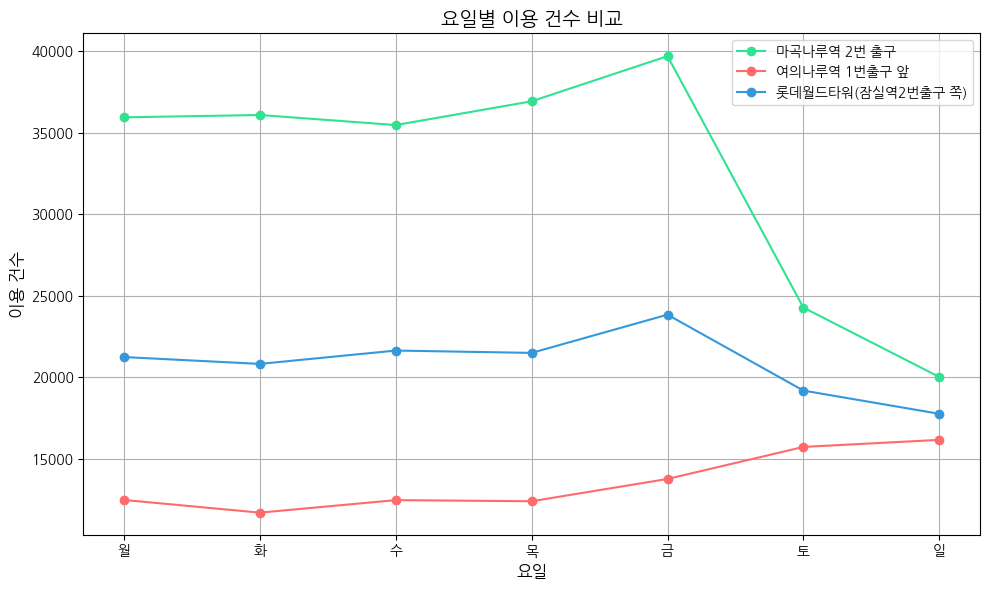

In [34]:
days = ['월','화','수','목','금','토','일']

# 각 대여소별로 요일별 이용 건수를 집계
usage_magok = df_magok['요일'].value_counts().reindex(days, fill_value=0)
usage_yeoui = df_yeoui['요일'].value_counts().reindex(days, fill_value=0)
usage_jamsil = df_jamsil['요일'].value_counts().reindex(days, fill_value=0)

plt.figure(figsize=(10,6))
plt.plot(days, usage_magok, marker='o', label="마곡나루역 2번 출구", color=pastel_colors[0])
plt.plot(days, usage_yeoui, marker='o', label="여의나루역 1번출구 앞", color=pastel_colors[3])
plt.plot(days, usage_jamsil, marker='o', label="롯데월드타워(잠실역2번출구 쪽)", color=pastel_colors[2])
plt.title("요일별 이용 건수 비교", fontsize=14)
plt.xlabel("요일", fontsize=12)
plt.ylabel("이용 건수", fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## **대여소별 요일별 성별 비율**

In [35]:

days = ["월", "화", "수", "목", "금", "토", "일"]

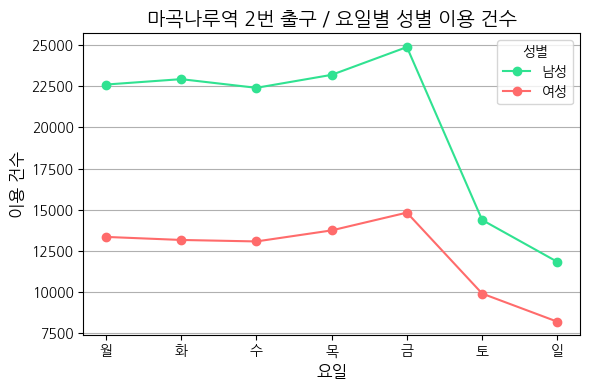

In [36]:
df_rental = df_magok[['대여일시', '성별']].dropna(subset=['대여일시']).copy()
df_rental['요일'] = df_rental['대여일시'].dt.day_name().map(day_name_mapping)

grouped = df_rental.groupby(['요일', '성별']).size().reset_index(name='이용건수')

pivot = grouped.pivot(index='요일', columns='성별', values='이용건수').fillna(0)

pivot = pivot.reindex(index=days)

colors = [gender_colors[col] for col in pivot.columns]

ax = pivot.plot(kind='line', marker='o', color=colors, figsize=(6,4))

ax.set_title("마곡나루역 2번 출구 / 요일별 성별 이용 건수", fontsize=14)
ax.set_xlabel("요일", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.legend(title="성별")
plt.tight_layout()
plt.show()


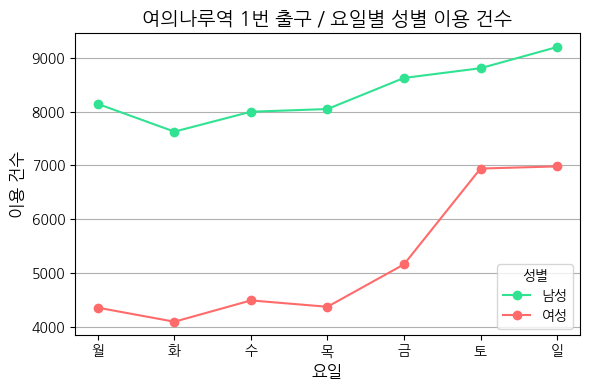

In [37]:
df_rental = df_yeoui[['대여일시', '성별']].dropna(subset=['대여일시']).copy()
df_rental['요일'] = df_rental['대여일시'].dt.day_name().map(day_name_mapping)

grouped = df_rental.groupby(['요일', '성별']).size().reset_index(name='이용건수')

pivot = grouped.pivot(index='요일', columns='성별', values='이용건수').fillna(0)

pivot = pivot.reindex(index=days)

colors = [gender_colors[col] for col in pivot.columns]

ax = pivot.plot(kind='line', marker='o', color=colors, figsize=(6,4))

ax.set_title("여의나루역 1번 출구 / 요일별 성별 이용 건수", fontsize=14)
ax.set_xlabel("요일", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.legend(title="성별")
plt.tight_layout()
plt.show()


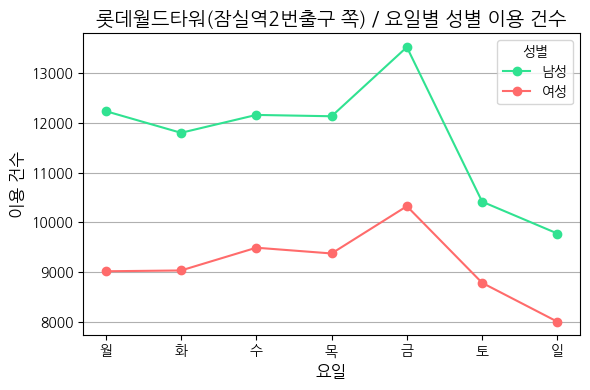

In [38]:
df_rental = df_jamsil[['대여일시', '성별']].dropna(subset=['대여일시']).copy()
df_rental['요일'] = df_rental['대여일시'].dt.day_name().map(day_name_mapping)

grouped = df_rental.groupby(['요일', '성별']).size().reset_index(name='이용건수')

pivot = grouped.pivot(index='요일', columns='성별', values='이용건수').fillna(0)

pivot = pivot.reindex(index=days)

colors = [gender_colors[col] for col in pivot.columns]

ax = pivot.plot(kind='line', marker='o', color=colors, figsize=(6,4))

ax.set_title("롯데월드타워(잠실역2번출구 쪽) / 요일별 성별 이용 건수", fontsize=14)
ax.set_xlabel("요일", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.legend(title="성별")
plt.tight_layout()
plt.show()

## **대여소별 요일별 연령대 이용건수**

<Figure size 1000x600 with 0 Axes>

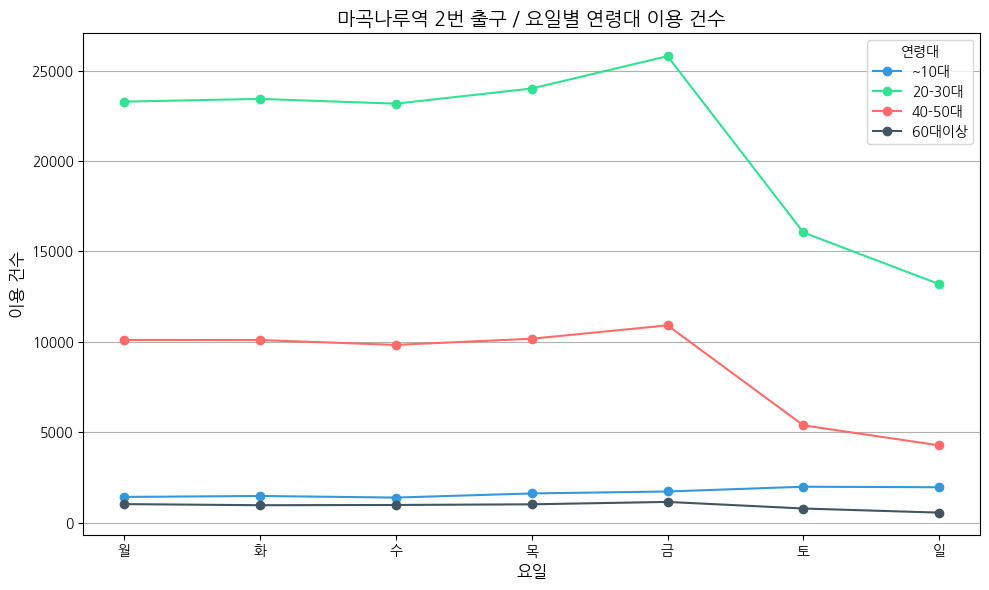

In [39]:
grouped_magok = df_magok.groupby(['요일', '연령대']).size().reset_index(name='이용건수')

pivot_magok = grouped_magok.pivot(index='요일', columns='연령대', values='이용건수').reindex(days, fill_value=0)

pivot_magok = pivot_magok.reindex(columns=age_order, fill_value=0)

colors = [age_color[age] for age in age_order]

plt.figure(figsize=(10, 6))
pivot_magok.plot(kind='line', marker='o', figsize=(10,6), color=colors)
plt.title("마곡나루역 2번 출구 / 요일별 연령대 이용 건수", fontsize=14)
plt.xlabel("요일", fontsize=12)
plt.ylabel("이용 건수", fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.legend(title="연령대")
plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

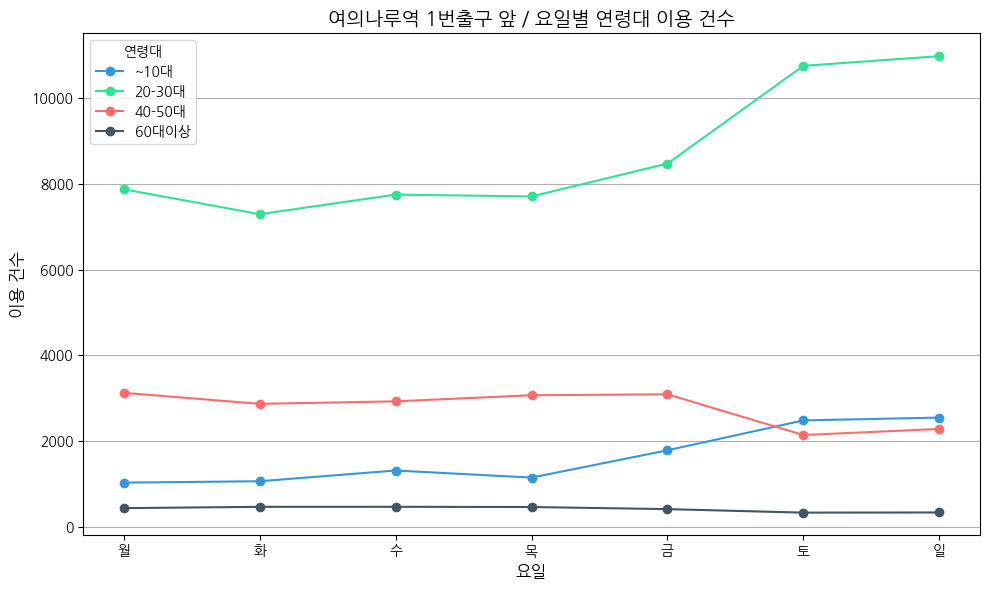

In [40]:
grouped_yeoui = df_yeoui.groupby(['요일', '연령대']).size().reset_index(name='이용건수')

pivot_yeoui = grouped_yeoui.pivot(index='요일', columns='연령대', values='이용건수').reindex(days, fill_value=0)
pivot_yeoui = pivot_yeoui.reindex(columns=age_order, fill_value=0)

colors = [age_color[age] for age in age_order]

plt.figure(figsize=(10, 6))
pivot_yeoui.plot(kind='line', marker='o', figsize=(10,6), color=colors)
plt.title("여의나루역 1번출구 앞 / 요일별 연령대 이용 건수", fontsize=14)
plt.xlabel("요일", fontsize=12)
plt.ylabel("이용 건수", fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.legend(title="연령대")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

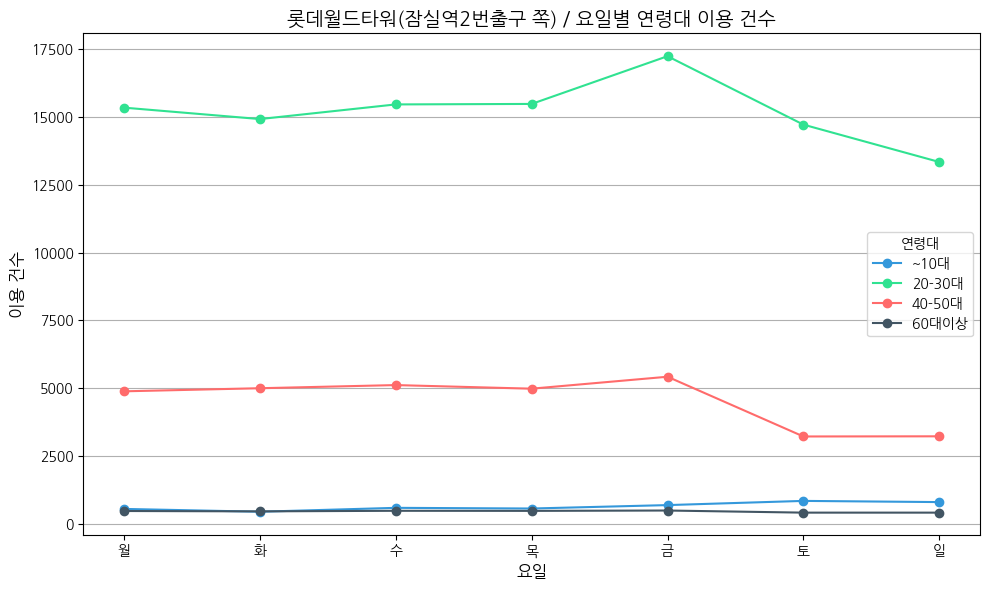

In [41]:
grouped_jamsil = df_jamsil.groupby(['요일', '연령대']).size().reset_index(name='이용건수')

pivot_jamsil = grouped_jamsil.pivot(index='요일', columns='연령대', values='이용건수').reindex(days, fill_value=0)
pivot_jamsil = pivot_jamsil.reindex(columns=age_order, fill_value=0)

colors = [age_color[age] for age in age_order]

plt.figure(figsize=(10, 6))
pivot_jamsil.plot(kind='line', marker='o', figsize=(10,6), color=colors)
plt.title("롯데월드타워(잠실역2번출구 쪽) / 요일별 연령대 이용 건수", fontsize=14)
plt.xlabel("요일", fontsize=12)
plt.ylabel("이용 건수", fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.legend(title="연령대")
plt.tight_layout()
plt.show()


## 시간대별 대여소 이용건수

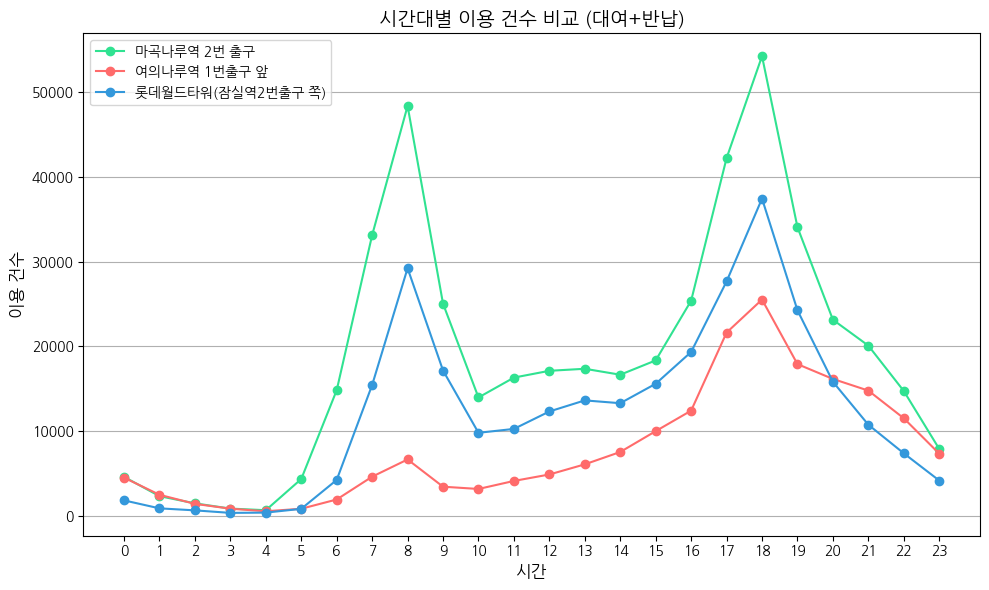

In [42]:
# --- 마곡나루역 2번 출구 ---
df_rental_magok = df_magok[['대여일시']].dropna().copy()
df_rental_magok['시간'] = df_rental_magok['대여일시'].dt.hour
df_return_magok = df_magok[['반납일시']].dropna().copy()
df_return_magok['시간'] = df_return_magok['반납일시'].dt.hour
df_combined_magok = pd.concat([df_rental_magok[['시간']], df_return_magok[['시간']]])
usage_time_magok = df_combined_magok['시간'].value_counts().sort_index().reindex(range(0,24), fill_value=0)

# --- 여의나루역 1번출구 앞 ---
df_rental_yeoui = df_yeoui[['대여일시']].dropna().copy()
df_rental_yeoui['시간'] = df_rental_yeoui['대여일시'].dt.hour
df_return_yeoui = df_yeoui[['반납일시']].dropna().copy()
df_return_yeoui['시간'] = df_return_yeoui['반납일시'].dt.hour
df_combined_yeoui = pd.concat([df_rental_yeoui[['시간']], df_return_yeoui[['시간']]])
usage_time_yeoui = df_combined_yeoui['시간'].value_counts().sort_index().reindex(range(0,24), fill_value=0)

# --- 롯데월드타워(잠실역2번출구 쪽) ---
df_rental_jamsil = df_jamsil[['대여일시']].dropna().copy()
df_rental_jamsil['시간'] = df_rental_jamsil['대여일시'].dt.hour
df_return_jamsil = df_jamsil[['반납일시']].dropna().copy()
df_return_jamsil['시간'] = df_return_jamsil['반납일시'].dt.hour
df_combined_jamsil = pd.concat([df_rental_jamsil[['시간']], df_return_jamsil[['시간']]])
usage_time_jamsil = df_combined_jamsil['시간'].value_counts().sort_index().reindex(range(0,24), fill_value=0)

plt.figure(figsize=(10,6))
plt.plot(range(0,24), usage_time_magok, marker='o', label="마곡나루역 2번 출구", color=pastel_colors[0])
plt.plot(range(0,24), usage_time_yeoui, marker='o', label="여의나루역 1번출구 앞", color=pastel_colors[3])
plt.plot(range(0,24), usage_time_jamsil, marker='o', label="롯데월드타워(잠실역2번출구 쪽)", color=pastel_colors[2])
plt.title("시간대별 이용 건수 비교 (대여+반납)", fontsize=14)
plt.xlabel("시간", fontsize=12)
plt.ylabel("이용 건수", fontsize=12)
plt.xticks(range(0,24))
plt.grid(True, axis='y')
plt.legend()
plt.tight_layout()
plt.show()

## **시간대별 성별 이용건수**

<Figure size 1000x600 with 0 Axes>

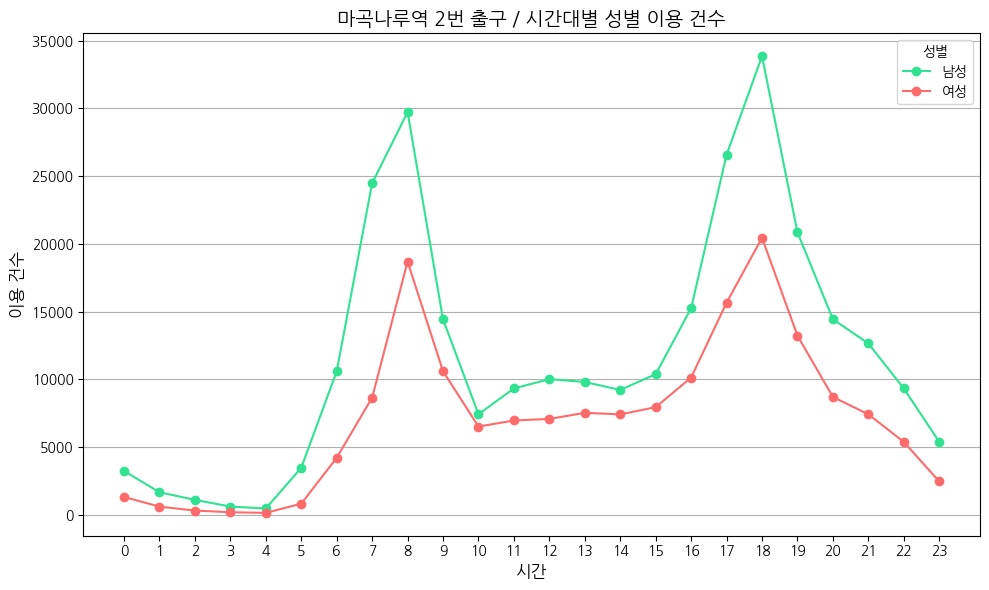

In [43]:
df_rental = df_magok[['대여일시', '성별']].dropna(subset=['대여일시']).copy()
df_rental['이용시간'] = df_rental['대여일시'].dt.hour

df_return = df_magok[['반납일시', '성별']].dropna(subset=['반납일시']).copy()
df_return['이용시간'] = df_return['반납일시'].dt.hour

df_events = pd.concat([df_rental[['이용시간', '성별']], df_return[['이용시간', '성별']]])

grouped = df_events.groupby(['이용시간', '성별']).size().reset_index(name='이용건수')

pivot = grouped.pivot(index='이용시간', columns='성별', values='이용건수').reindex(range(0,24), fill_value=0)
pivot = pivot.reindex(columns=['남성','여성'], fill_value=0)

plt.figure(figsize=(10,6))
ax = pivot.plot(kind='line', marker='o', figsize=(10,6),
                color=[gender_colors['남성'], gender_colors['여성']])

ax.set_title("마곡나루역 2번 출구 / 시간대별 성별 이용 건수", fontsize=14)
ax.set_xlabel("시간", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)
plt.xticks(range(0,24))
plt.legend(title="성별")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()



<Figure size 1000x600 with 0 Axes>

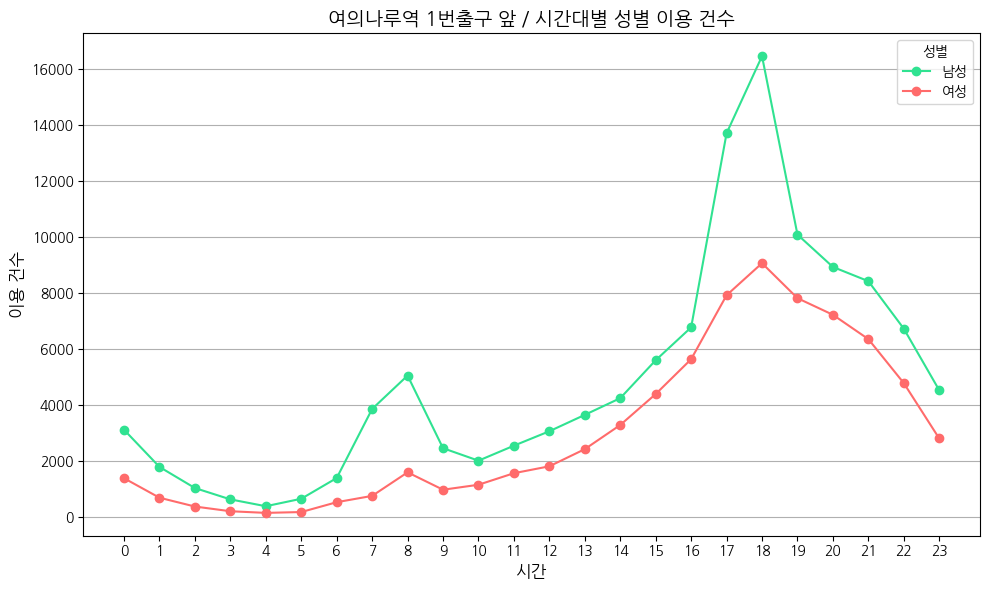

In [44]:
df_rental = df_yeoui[['대여일시', '성별']].dropna(subset=['대여일시']).copy()
df_rental['이용시간'] = df_rental['대여일시'].dt.hour

df_return = df_yeoui[['반납일시', '성별']].dropna(subset=['반납일시']).copy()
df_return['이용시간'] = df_return['반납일시'].dt.hour

df_events = pd.concat([df_rental[['이용시간', '성별']], df_return[['이용시간', '성별']]])

grouped = df_events.groupby(['이용시간', '성별']).size().reset_index(name='이용건수')

pivot = grouped.pivot(index='이용시간', columns='성별', values='이용건수').reindex(range(0,24), fill_value=0)
pivot = pivot.reindex(columns=['남성','여성'], fill_value=0)

plt.figure(figsize=(10,6))
ax = pivot.plot(kind='line', marker='o', figsize=(10,6),
                                color=[gender_colors['남성'], gender_colors['여성']])

ax.set_title("여의나루역 1번출구 앞 / 시간대별 성별 이용 건수", fontsize=14)
ax.set_xlabel("시간", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)
plt.xticks(range(0,24))
plt.legend(title="성별")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

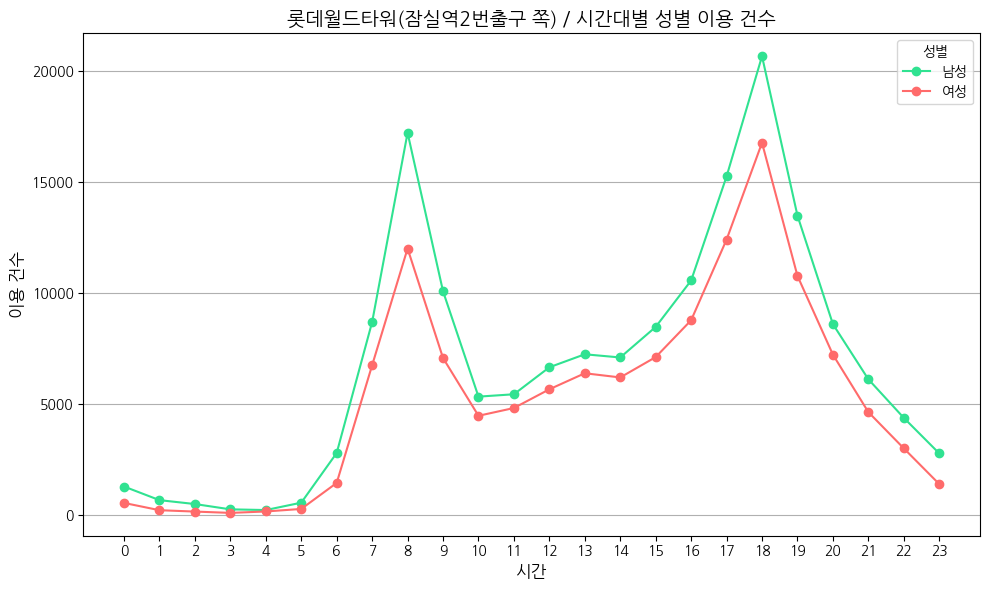

In [45]:
df_rental = df_jamsil[['대여일시', '성별']].dropna(subset=['대여일시']).copy()
df_rental['이용시간'] = df_rental['대여일시'].dt.hour

df_return = df_jamsil[['반납일시', '성별']].dropna(subset=['반납일시']).copy()
df_return['이용시간'] = df_return['반납일시'].dt.hour

df_events = pd.concat([df_rental[['이용시간', '성별']], df_return[['이용시간', '성별']]])

grouped = df_events.groupby(['이용시간', '성별']).size().reset_index(name='이용건수')

pivot = grouped.pivot(index='이용시간', columns='성별', values='이용건수').reindex(range(0,24), fill_value=0)
pivot = pivot.reindex(columns=['남성','여성'], fill_value=0)

plt.figure(figsize=(10,6))
ax = pivot.plot(kind='line', marker='o', figsize=(10,6),
                color=[gender_colors['남성'], gender_colors['여성']])

ax.set_title("롯데월드타워(잠실역2번출구 쪽) / 시간대별 성별 이용 건수", fontsize=14)
ax.set_xlabel("시간", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)
plt.xticks(range(0,24))
plt.legend(title="성별")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


## **시간대별 연령대 이용건수**

<Figure size 1000x600 with 0 Axes>

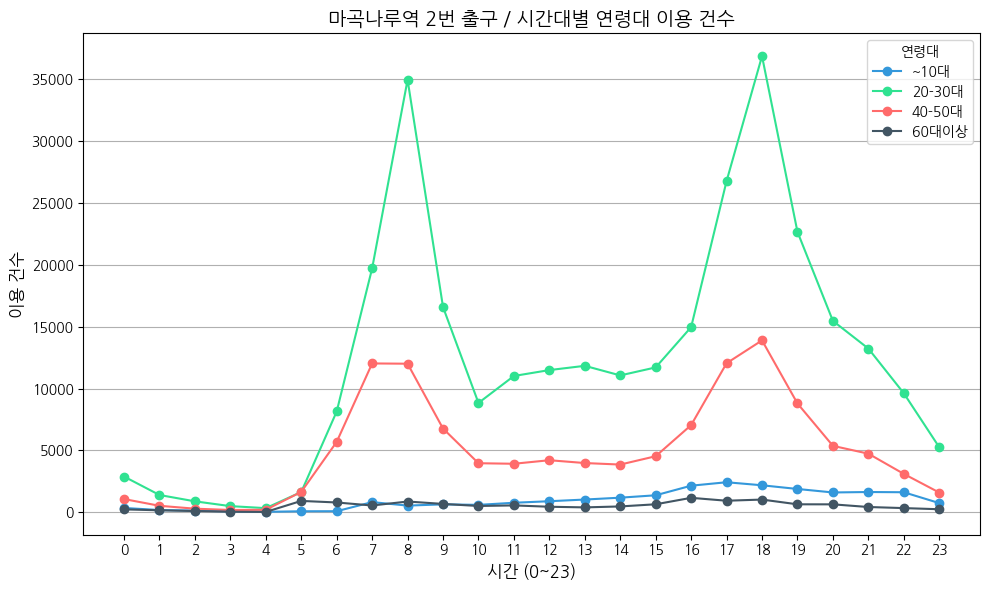

In [46]:
df_rental = df_magok[['대여일시', '연령대']].dropna(subset=['대여일시']).copy()
df_rental['이용시간'] = df_rental['대여일시'].dt.hour

df_return = df_magok[['반납일시', '연령대']].dropna(subset=['반납일시']).copy()
df_return['이용시간'] = df_return['반납일시'].dt.hour

df_events = pd.concat([df_rental[['이용시간', '연령대']], df_return[['이용시간', '연령대']]])

grouped = df_events.groupby(['이용시간', '연령대']).size().reset_index(name='이용건수')
pivot = grouped.pivot(index='이용시간', columns='연령대', values='이용건수').reindex(range(0,24), fill_value=0)
pivot = pivot.reindex(columns=age_order, fill_value=0)
colors = [age_color[age] for age in age_order]

plt.figure(figsize=(10,6))
ax = pivot.plot(kind='line', marker='o', figsize=(10,6), color=colors)
ax.set_title("마곡나루역 2번 출구 / 시간대별 연령대 이용 건수", fontsize=14)
ax.set_xlabel("시간 (0~23)", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)
plt.xticks(range(0,24))
plt.legend(title="연령대")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

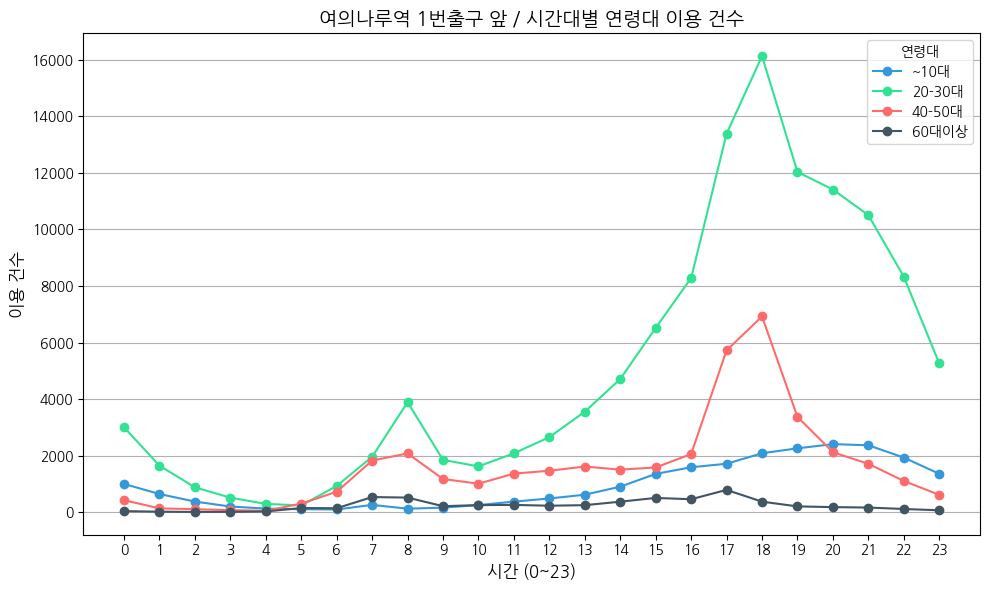

In [47]:
df_rental = df_yeoui[['대여일시', '연령대']].dropna(subset=['대여일시']).copy()
df_rental['이용시간'] = df_rental['대여일시'].dt.hour

df_return = df_yeoui[['반납일시', '연령대']].dropna(subset=['반납일시']).copy()
df_return['이용시간'] = df_return['반납일시'].dt.hour

df_events = pd.concat([df_rental[['이용시간', '연령대']], df_return[['이용시간', '연령대']]])

grouped = df_events.groupby(['이용시간', '연령대']).size().reset_index(name='이용건수')
pivot = grouped.pivot(index='이용시간', columns='연령대', values='이용건수').reindex(range(0,24), fill_value=0)
pivot = pivot.reindex(columns=age_order, fill_value=0)
colors = [age_color[age] for age in age_order]

plt.figure(figsize=(10,6))
ax = pivot.plot(kind='line', marker='o', figsize=(10,6), color=colors)
ax.set_title("여의나루역 1번출구 앞 / 시간대별 연령대 이용 건수", fontsize=14)
ax.set_xlabel("시간 (0~23)", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)
plt.xticks(range(0,24))
plt.legend(title="연령대")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

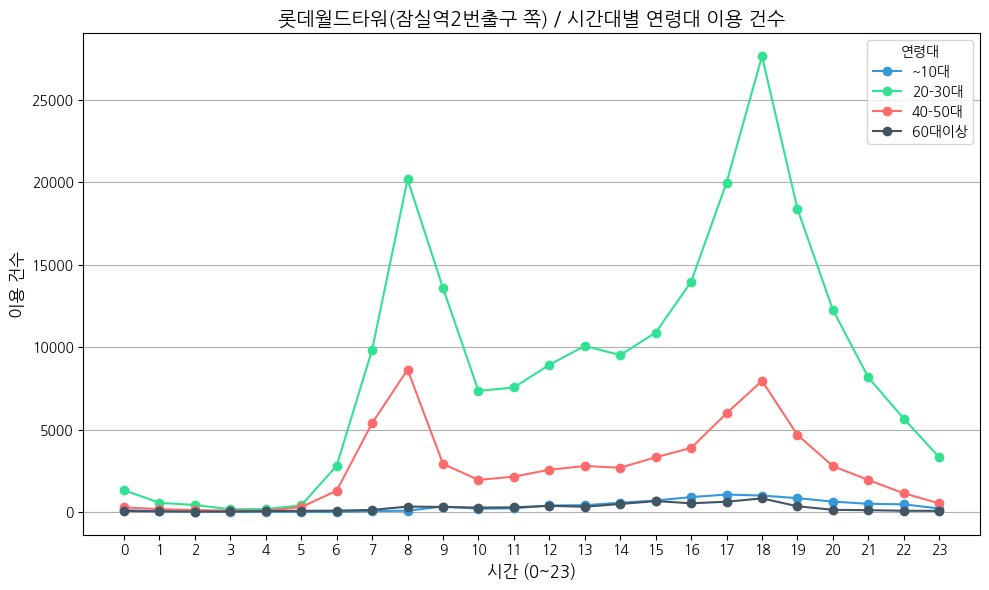

In [48]:
df_rental = df_jamsil[['대여일시', '연령대']].dropna(subset=['대여일시']).copy()
df_rental['이용시간'] = df_rental['대여일시'].dt.hour

df_return = df_jamsil[['반납일시', '연령대']].dropna(subset=['반납일시']).copy()
df_return['이용시간'] = df_return['반납일시'].dt.hour

df_events = pd.concat([df_rental[['이용시간', '연령대']], df_return[['이용시간', '연령대']]])

grouped = df_events.groupby(['이용시간', '연령대']).size().reset_index(name='이용건수')
pivot = grouped.pivot(index='이용시간', columns='연령대', values='이용건수').reindex(range(0,24), fill_value=0)
pivot = pivot.reindex(columns=age_order, fill_value=0)
colors = [age_color[age] for age in age_order]

plt.figure(figsize=(10,6))
ax = pivot.plot(kind='line', marker='o', figsize=(10,6), color=colors)
ax.set_title("롯데월드타워(잠실역2번출구 쪽) / 시간대별 연령대 이용 건수", fontsize=14)
ax.set_xlabel("시간 (0~23)", fontsize=12)
ax.set_ylabel("이용 건수", fontsize=12)
plt.xticks(range(0,24))
plt.legend(title="연령대")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# 가설

In [49]:
print("마곡나루 :", df_magok.head(3))
print("=============================================================================================")
print("마곡나루 :", df_yeoui.head(3))
print("=============================================================================================")
print("마곡나루 :", df_jamsil.head(3))
print("=============================================================================================")

마곡나루 :                  대여일시              대여소명                반납일시  \
0 2024-01-01 00:19:04       마곡나루역 2번 출구 2024-01-01 00:20:26   
1 2024-01-01 00:22:25  방화사거리 마을버스 버스정류장 2024-01-01 00:31:35   
3 2024-01-01 00:19:01       마곡나루역 2번 출구 2024-01-01 00:33:51   

                       반납대여소명  이용시간(분)  이용거리(M)  성별    나이     연령대 요일  대여월  반납월  
0                 마곡나루역 2번 출구      1.0     10.0  여성  26.0  20-30대  월    1    1  
1                 마곡나루역 2번 출구      9.0   2100.0  남성  22.0  20-30대  월    1    1  
3  마곡13단지힐스테이트마스터 후문(1320동 앞)     14.0   1630.9  남성  33.0  20-30대  월    1    1  
마곡나루 :                  대여일시          대여소명                반납일시        반납대여소명  \
2 2024-01-01 00:16:39  여의나루역 1번출구 앞 2024-01-01 00:33:05       어울림병원 앞   
6 2024-01-01 00:28:17      신길역 2번출구 2024-01-01 00:42:27  여의나루역 1번출구 앞   
7 2024-01-01 00:25:54      신길역 2번출구 2024-01-01 00:42:58  여의나루역 1번출구 앞   

   이용시간(분)  이용거리(M)  성별    나이     연령대 요일  대여월  반납월  
2     16.0  2340.00  남성  33.0  20-30대  월    1    1  
6     14.0

## 대여소별 평일 주말 비교

### **Cohen's d란?**
- 두 집단의 평균이 얼마나 차이가 나는지 보여주는 값
- 두 그룹의 평균과 표준편차를 구한 후 , 평균 차이를 표준편차로 나눈다


*   0.2 이하: 효과 크기가 작다
*   0.5 정도: 보통 효과 크기
*   0.8 이상: 큰 효과 크기





In [50]:
from scipy.stats import ttest_ind

In [51]:
stations = ["마곡나루역 2번 출구", "여의나루역 1번출구 앞", "롯데월드타워(잠실역2번출구 쪽)"]

for station in stations:
    df_station = df[(df['대여소명'] == station) | (df['반납대여소명'] == station)].copy()
    df_station['요일'] = df_station['대여일시'].dt.weekday
    df_station['날짜'] = df_station['대여일시'].dt.date
    df_station['평일여부'] = df_station['요일'] < 5  # 월~금: 평일, 토~일: 주말

    usage_by_day = df_station.groupby(['날짜', '평일여부']).size().reset_index(name='이용건수')

    weekday_counts = usage_by_day[usage_by_day['평일여부'] == True]['이용건수']
    weekend_counts = usage_by_day[usage_by_day['평일여부'] == False]['이용건수']

    t_stat, p_value = ttest_ind(weekday_counts, weekend_counts, equal_var=True)

    # Cohen's d 계산 함수
    def calc_cohens_d(x, y):
        mean_diff = np.mean(x) - np.mean(y)
        pooled_std = np.sqrt((np.std(x, ddof=1)**2 + np.std(y, ddof=1)**2) / 2)
        return mean_diff / pooled_std

    cohens_d = calc_cohens_d(weekday_counts, weekend_counts)

    std_weekday = np.std(weekday_counts, ddof=1)
    std_weekend = np.std(weekend_counts, ddof=1)

    # 효과 크기 해석
    abs_d = abs(cohens_d)
    if abs_d < 0.2:
        effect = "매우 작은 효과 (무시해도 될 정도) 😭"
    elif abs_d < 0.5:
        effect = "작은 효과 🤔👎"
    elif abs_d < 0.8:
        effect = "중간 정도의 효과 😒"
    else:
        effect = "큰 효과 😄👍"

    # 결과 출력 (모든 소수점 둘째자리까지 반올림)
    print(f"========= {station} =========")
    print("평일 이용건수 평균:", f"{weekday_counts.mean():.2f}")
    print("평일 이용건수 표준편차:", f"{std_weekday:.2f}")
    print("주말 이용건수 평균:", f"{weekend_counts.mean():.2f}")
    print("주말 이용건수 표준편차:", f"{std_weekend:.2f}")
    print(f"t-statistic: {t_stat:.2f}")
    print(f"p-value: {p_value:.2f}")
    print(f"Cohen's d: {cohens_d:.2f}")

    # 유의미한 차이 여부 확인
    if p_value < 0.05:
        print("✅ 주말과 평일 이용 건수 사이에 유의미한 차이가 있습니다.")
    else:
        print("❌ 주말과 평일 이용 건수 사이에 유의미한 차이가 없습니다.")

    print("효과 크기:", effect)

========= 마곡나루역 2번 출구 =========
평일 이용건수 평균: 702.74
평일 이용건수 표준편차: 257.21
주말 이용건수 평균: 426.15
주말 이용건수 표준편차: 185.41
t-statistic: 9.98
p-value: 0.00
Cohen's d: 1.23
✅ 주말과 평일 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 큰 효과 😄👍
========= 여의나루역 1번출구 앞 =========
평일 이용건수 평균: 240.07
평일 이용건수 표준편차: 154.81
주말 이용건수 평균: 306.95
주말 이용건수 표준편차: 255.41
t-statistic: -3.06
p-value: 0.00
Cohen's d: -0.32
✅ 주말과 평일 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 작은 효과 🤔👎
========= 롯데월드타워(잠실역2번출구 쪽) =========
평일 이용건수 평균: 416.39
평일 이용건수 표준편차: 191.58
주말 이용건수 평균: 355.53
주말 이용건수 표준편차: 177.74
t-statistic: 2.80
p-value: 0.01
Cohen's d: 0.33
✅ 주말과 평일 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 작은 효과 🤔👎


## 대여소별 연령대 비교

In [52]:
from scipy.stats import f_oneway

for station in stations:
    df_station = df[(df['대여소명'] == station) | (df['반납대여소명'] == station)].copy()
    df_station['날짜'] = df_station['대여일시'].dt.date
    usage_age = df_station.groupby(['날짜', '연령대']).size().reset_index(name='이용건수')

    usage_age_pivot = usage_age.pivot(index='날짜', columns='연령대', values='이용건수').fillna(0)

    ten = usage_age_pivot['~10대'].values
    twenty_thirty = usage_age_pivot['20-30대'].values
    forty_fifty = usage_age_pivot['40-50대'].values
    sixty_above = usage_age_pivot['60대이상'].values

    # ANOVA (일원분산분석)
    f_stat, p_value = f_oneway(ten, twenty_thirty, forty_fifty, sixty_above)

    n = len(ten)
    df_between = 4 - 1  # 4개 그룹이므로
    df_within = 4 * n - 4
    eta_squared = (f_stat * df_between) / (f_stat * df_between + df_within)

    if eta_squared < 0.01:
        effect = "매우 작은 효과 😭"
    elif eta_squared < 0.06:
        effect = "작은 효과 🤔👎"
    elif eta_squared < 0.14:
        effect = "중간 정도의 효과 😒"
    else:
        effect = "큰 효과 😄👍"

    print(f"========= {station} =========")
    print(f"ANOVA F-statistic: {f_stat:.2f}")
    print(f"ANOVA p-value: {p_value:.2f}")
    print(f"Eta Squared: {eta_squared:.2f}")
    print("효과 크기:", effect)
    print("\n")


========= 마곡나루역 2번 출구 =========
ANOVA F-statistic: 1260.66
ANOVA p-value: 0.00
Eta Squared: 0.72
효과 크기: 큰 효과 😄👍


========= 여의나루역 1번출구 앞 =========
ANOVA F-statistic: 335.12
ANOVA p-value: 0.00
Eta Squared: 0.41
효과 크기: 큰 효과 😄👍


========= 롯데월드타워(잠실역2번출구 쪽) =========
ANOVA F-statistic: 1172.60
ANOVA p-value: 0.00
Eta Squared: 0.71
효과 크기: 큰 효과 😄👍




In [53]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['날짜'] = df['대여일시'].dt.date
df['평일여부'] = df['대여일시'].dt.weekday

In [54]:
# 마곡나루역 2번 출구
df_magok = df[(df['대여소명'] == '마곡나루역 2번 출구') | (df['반납대여소명'] == '마곡나루역 2번 출구')]

# 여의나루역 1번출구 앞
df_yeoui = df[(df['대여소명'] == '여의나루역 1번출구 앞') | (df['반납대여소명'] == '여의나루역 1번출구 앞')]

# 롯데월드타워(잠실역2번출구 쪽)
df_jamsil = df[(df['대여소명'] == '롯데월드타워(잠실역2번출구 쪽)') | (df['반납대여소명'] == '롯데월드타워(잠실역2번출구 쪽)')]

## 마곡나루역 평일 주말 성별 비교

In [55]:
# 평일/주말, 성별 일별 이용건수 집계
def get_daily_counts(condition):
    data = df_magok[condition]
    counts = data.groupby('날짜').size()
    return counts

# 일별 이용건수
weekday_male  = get_daily_counts((df_magok['평일여부'] == True)  & (df_magok['성별'] == '남성'))
weekday_female = get_daily_counts((df_magok['평일여부'] == True)  & (df_magok['성별'] == '여성'))
weekend_male  = get_daily_counts((df_magok['평일여부'] == False) & (df_magok['성별'] == '남성'))
weekend_female = get_daily_counts((df_magok['평일여부'] == False) & (df_magok['성별'] == '여성'))

# Cohen's d 계산
def calc_cohens_d(x, y):
    mean_diff = np.mean(x) - np.mean(y)
    pooled_std = np.sqrt((np.std(x, ddof=1)**2 + np.std(y, ddof=1)**2) / 2)
    return mean_diff / pooled_std

# 효과 크기 해석
def interpret_effect(d):
    abs_d = abs(d)
    if abs_d < 0.2:
        return "매우 작은 효과 (무시해도 될 정도) 😭"
    elif abs_d < 0.5:
        return "작은 효과 🤔👎"
    elif abs_d < 0.8:
        return "중간 정도의 효과 😒"
    else:
        return "큰 효과 😄👍"

# (1) 평일 남성 vs 평일 여성 비교
t_stat_a, p_val_a = ttest_ind(weekday_male, weekday_female, equal_var=True)
cohens_d_a = calc_cohens_d(weekday_male, weekday_female)

# (2) 주말 남성 vs 주말 여성 비교
t_stat_b, p_val_b = ttest_ind(weekend_male, weekend_female, equal_var=True)
cohens_d_b = calc_cohens_d(weekend_male, weekend_female)

# 딕셔너리로 저장
comparisons = {
    "평일 남성 vs 평일 여성": (weekday_male, weekday_female, t_stat_a, p_val_a, cohens_d_a),
    "주말 남성 vs 주말 여성": (weekend_male, weekend_female, t_stat_b, p_val_b, cohens_d_b),
}

# 결과 출력
for comp_name, (group1, group2, t_val, p_val, d_val) in comparisons.items():
    mean_group1 = np.mean(group1)
    mean_group2 = np.mean(group2)
    std_group1 = np.std(group1, ddof=1)
    std_group2 = np.std(group2, ddof=1)
    effect = interpret_effect(d_val)

    groups = comp_name.split(" vs ")

    print(f"========== {comp_name} ==========")
    print(f"{groups[0]} 평균: {mean_group1:.2f}")
    print(f"{groups[1]} 평균: {mean_group2:.2f}")
    print(f"{groups[0]} 표준편차: {std_group1:.2f}")
    print(f"{groups[1]} 표준편차: {std_group2:.2f}")
    print(f"t-statistic: {t_val:.2f}")
    print(f"p-value: {p_val:.2f}")
    print(f"Cohen's d: {d_val:.2f}")

    if p_val < 0.05:
        print(f"✅ {groups[0]}와 {groups[1]} 이용 건수 사이에 유의미한 차이가 있습니다.")
    else:
        print(f"❌ {groups[0]}와 {groups[1]} 이용 건수 사이에 유의미한 차이가 없습니다.")

    print("효과 크기:", effect)
    print("\n")

========== 평일 남성 vs 평일 여성 ==========
평일 남성 평균: 432.49
평일 여성 평균: 248.38
평일 남성 표준편차: 148.28
평일 여성 표준편차: 99.98
t-statistic: 7.49
p-value: 0.00
Cohen's d: 1.46
✅ 평일 남성와 평일 여성 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 큰 효과 😄👍


========== 주말 남성 vs 주말 여성 ==========
주말 남성 평균: 426.30
주말 여성 평균: 251.87
주말 남성 표준편차: 154.62
주말 여성 표준편차: 102.73
t-statistic: 6.84
p-value: 0.00
Cohen's d: 1.33
✅ 주말 남성와 주말 여성 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 큰 효과 😄👍




## 여의나루역 평일 주말 성별 비교

In [56]:
# 평일/주말, 성별 일별 이용건수 집계
def get_daily_counts(condition):
    data = df_yeoui[condition]
    counts = data.groupby('날짜').size()
    return counts

# 일별 이용건수
weekday_male  = get_daily_counts((df_yeoui['평일여부'] == True)  & (df_yeoui['성별'] == '남성'))
weekday_female = get_daily_counts((df_yeoui['평일여부'] == True)  & (df_yeoui['성별'] == '여성'))
weekend_male  = get_daily_counts((df_yeoui['평일여부'] == False) & (df_yeoui['성별'] == '남성'))
weekend_female = get_daily_counts((df_yeoui['평일여부'] == False) & (df_yeoui['성별'] == '여성'))

# Cohen's d 계산
def calc_cohens_d(x, y):
    mean_diff = np.mean(x) - np.mean(y)
    pooled_std = np.sqrt((np.std(x, ddof=1)**2 + np.std(y, ddof=1)**2) / 2)
    return mean_diff / pooled_std

# 효과 크기 해석
def interpret_effect(d):
    abs_d = abs(d)
    if abs_d < 0.2:
        return "매우 작은 효과 (무시해도 될 정도) 😭"
    elif abs_d < 0.5:
        return "작은 효과 🤔👎"
    elif abs_d < 0.8:
        return "중간 정도의 효과 😒"
    else:
        return "큰 효과 😄👍"

# (1) 평일 남성 vs 평일 여성 비교
t_stat_a, p_val_a = ttest_ind(weekday_male, weekday_female, equal_var=True)
cohens_d_a = calc_cohens_d(weekday_male, weekday_female)

# (2) 주말 남성 vs 주말 여성 비교
t_stat_b, p_val_b = ttest_ind(weekend_male, weekend_female, equal_var=True)
cohens_d_b = calc_cohens_d(weekend_male, weekend_female)

# 딕셔너리로 저장
comparisons = {
    "평일 남성 vs 평일 여성": (weekday_male, weekday_female, t_stat_a, p_val_a, cohens_d_a),
    "주말 남성 vs 주말 여성": (weekend_male, weekend_female, t_stat_b, p_val_b, cohens_d_b),
}

# 결과 출력
for comp_name, (group1, group2, t_val, p_val, d_val) in comparisons.items():
    mean_group1 = np.mean(group1)
    mean_group2 = np.mean(group2)
    std_group1 = np.std(group1, ddof=1)
    std_group2 = np.std(group2, ddof=1)
    effect = interpret_effect(d_val)

    groups = comp_name.split(" vs ")

    print(f"========== {comp_name} ==========")
    print(f"{groups[0]} 평균: {mean_group1:.2f}")
    print(f"{groups[1]} 평균: {mean_group2:.2f}")
    print(f"{groups[0]} 표준편차: {std_group1:.2f}")
    print(f"{groups[1]} 표준편차: {std_group2:.2f}")
    print(f"t-statistic: {t_val:.2f}")
    print(f"p-value: {p_val:.2f}")
    print(f"Cohen's d: {d_val:.2f}")

    if p_val < 0.05:
        print(f"✅ {groups[0]}와 {groups[1]} 이용 건수 사이에 유의미한 차이가 있습니다.")
    else:
        print(f"❌ {groups[0]}와 {groups[1]} 이용 건수 사이에 유의미한 차이가 없습니다.")

    print("효과 크기:", effect)
    print("\n")

========== 평일 남성 vs 평일 여성 ==========
평일 남성 평균: 143.89
평일 여성 평균: 77.23
평일 남성 표준편차: 80.30
평일 여성 표준편차: 68.69
t-statistic: 4.59
p-value: 0.00
Cohen's d: 0.89
✅ 평일 남성와 평일 여성 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 큰 효과 😄👍


========== 주말 남성 vs 주말 여성 ==========
주말 남성 평균: 153.60
주말 여성 평균: 82.15
주말 남성 표준편차: 83.92
주말 여성 표준편차: 62.83
t-statistic: 4.96
p-value: 0.00
Cohen's d: 0.96
✅ 주말 남성와 주말 여성 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 큰 효과 😄👍




## 롯데월드타워(잠실역2번출구) 평일 주말 성별 비교

In [57]:
# 평일/주말, 성별 일별 이용건수 집계
def get_daily_counts(condition):
    data = df_jamsil[condition]
    counts = data.groupby('날짜').size()
    return counts

# 일별 이용건수
weekday_male  = get_daily_counts((df_jamsil['평일여부'] == True)  & (df_jamsil['성별'] == '남성'))
weekday_female = get_daily_counts((df_jamsil['평일여부'] == True)  & (df_jamsil['성별'] == '여성'))
weekend_male  = get_daily_counts((df_jamsil['평일여부'] == False) & (df_jamsil['성별'] == '남성'))
weekend_female = get_daily_counts((df_jamsil['평일여부'] == False) & (df_jamsil['성별'] == '여성'))

# Cohen's d 계산
def calc_cohens_d(x, y):
    mean_diff = np.mean(x) - np.mean(y)
    pooled_std = np.sqrt((np.std(x, ddof=1)**2 + np.std(y, ddof=1)**2) / 2)
    return mean_diff / pooled_std

# 효과 크기 해석
def interpret_effect(d):
    abs_d = abs(d)
    if abs_d < 0.2:
        return "매우 작은 효과 (무시해도 될 정도) 😭"
    elif abs_d < 0.5:
        return "작은 효과 🤔👎"
    elif abs_d < 0.8:
        return "중간 정도의 효과 😒"
    else:
        return "큰 효과 😄👍"

# (1) 평일 남성 vs 평일 여성 비교
t_stat_a, p_val_a = ttest_ind(weekday_male, weekday_female, equal_var=True)
cohens_d_a = calc_cohens_d(weekday_male, weekday_female)

# (2) 주말 남성 vs 주말 여성 비교
t_stat_b, p_val_b = ttest_ind(weekend_male, weekend_female, equal_var=True)
cohens_d_b = calc_cohens_d(weekend_male, weekend_female)

# 딕셔너리로 저장
comparisons = {
    "평일 남성 vs 평일 여성": (weekday_male, weekday_female, t_stat_a, p_val_a, cohens_d_a),
    "주말 남성 vs 주말 여성": (weekend_male, weekend_female, t_stat_b, p_val_b, cohens_d_b),
}

# 결과 출력
for comp_name, (group1, group2, t_val, p_val, d_val) in comparisons.items():
    mean_group1 = np.mean(group1)
    mean_group2 = np.mean(group2)
    std_group1 = np.std(group1, ddof=1)
    std_group2 = np.std(group2, ddof=1)
    effect = interpret_effect(d_val)

    groups = comp_name.split(" vs ")

    print(f"========== {comp_name} ==========")
    print(f"{groups[0]} 평균: {mean_group1:.2f}")
    print(f"{groups[1]} 평균: {mean_group2:.2f}")
    print(f"{groups[0]} 표준편차: {std_group1:.2f}")
    print(f"{groups[1]} 표준편차: {std_group2:.2f}")
    print(f"t-statistic: {t_val:.2f}")
    print(f"p-value: {p_val:.2f}")
    print(f"Cohen's d: {d_val:.2f}")

    if p_val < 0.05:
        print(f"✅ {groups[0]}와 {groups[1]} 이용 건수 사이에 유의미한 차이가 있습니다.")
    else:
        print(f"❌ {groups[0]}와 {groups[1]} 이용 건수 사이에 유의미한 차이가 없습니다.")

    print("효과 크기:", effect)
    print("\n")

========== 평일 남성 vs 평일 여성 ==========
평일 남성 평균: 222.66
평일 여성 평균: 170.42
평일 남성 표준편차: 103.06
평일 여성 표준편차: 91.57
t-statistic: 2.76
p-value: 0.01
Cohen's d: 0.54
✅ 평일 남성와 평일 여성 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 중간 정도의 효과 😒


========== 주말 남성 vs 주말 여성 ==========
주말 남성 평균: 230.89
주말 여성 평균: 170.11
주말 남성 표준편차: 98.50
주말 여성 표준편차: 88.90
t-statistic: 3.33
p-value: 0.00
Cohen's d: 0.65
✅ 주말 남성와 주말 여성 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 중간 정도의 효과 😒




## 마곡나루역 출퇴근시간 성별 비교

In [58]:
# 대여와 반납을 '이용일시' 컬럼으로 변환한 후 결합
bike_rental = df_magok[['대여일시', '성별', '연령대']].copy().rename(columns={'대여일시': '이용일시'})
bike_return = df_magok[['반납일시', '성별', '연령대']].copy().rename(columns={'반납일시': '이용일시'})
combined = pd.concat([bike_rental, bike_return], ignore_index=True)

# 이용일시를 기반으로 날짜와 시간 추출
combined['이용일시'] = pd.to_datetime(combined['이용일시'])
combined['날짜'] = combined['이용일시'].dt.date
combined['hour'] = combined['이용일시'].dt.hour

# 출퇴근시간 오전 7,8,9시 오후 6,7,8시
commute_hours = [7, 8, 9, 18, 19, 20]
combined['출퇴근여부'] = combined['hour'].isin(commute_hours)

# 출퇴근시간 데이터와 그 외 시간 데이터 분리
df_commute = combined[combined['출퇴근여부'] == True]
df_no_commute = combined[combined['출퇴근여부'] == False]

# 일별 이용건수 집계
def daily_counts(data):
    return data.groupby('날짜').size()

# 남성 출퇴근시간 vs 그 외 시간
commute_male = daily_counts(df_commute[df_commute['성별'] == '남성'])
no_commute_male = daily_counts(df_no_commute[df_no_commute['성별'] == '남성'])

# 여성 출퇴근시간 vs 그 외 시간
commute_female = daily_counts(df_commute[df_commute['성별'] == '여성'])
no_commute_female = daily_counts(df_no_commute[df_no_commute['성별'] == '여성'])

# Cohen's d 계산 함수
def calc_cohens_d(x, y):
    mean_diff = np.mean(x) - np.mean(y)
    pooled_std = np.sqrt((np.std(x, ddof=1)**2 + np.std(y, ddof=1)**2) / 2)
    return mean_diff / pooled_std

cohens_d_male = calc_cohens_d(commute_male, no_commute_male)
cohens_d_female = calc_cohens_d(commute_female, no_commute_female)

# t-검정 수행
t_stat_male, p_val_male = ttest_ind(commute_male, no_commute_male, equal_var=True)
t_stat_female, p_val_female = ttest_ind(commute_female, no_commute_female, equal_var=True)

def interpret_effect(d):
    abs_d = abs(d)
    if abs_d < 0.2:
        return "매우 작은 효과 (무시해도 될 정도) 😭"
    elif abs_d < 0.5:
        return "작은 효과 🤔👎"
    elif abs_d < 0.8:
        return "중간 정도의 효과 😒"
    else:
        return "큰 효과 😄👍"

effect_male = interpret_effect(cohens_d_male)
effect_female = interpret_effect(cohens_d_female)

# 11. 결과 출력 (모든 수치는 소수점 둘째자리까지 반올림)
print("=== 출퇴근시간 남성 vs 그 외 시간 남성 ===")
print(f"출퇴근시간 남성 평균: {np.mean(commute_male):.2f}")
print(f"그 외 시간 남성 평균: {np.mean(no_commute_male):.2f}")
print(f"출퇴근시간 남성 표준편차: {np.std(commute_male, ddof=1):.2f}")
print(f"그 외 시간 남성 표준편차: {np.std(no_commute_male, ddof=1):.2f}")
print(f"t-statistic: {t_stat_male:.2f}")
print(f"p-value: {p_val_male:.2f}")
print(f"Cohen's d: {cohens_d_male:.2f}")
if p_val_male < 0.05:
    print("✅ 출퇴근시간 남성과 그 외 시간 남성 이용 건수 사이에 유의미한 차이가 있습니다.")
else:
    print("❌ 출퇴근시간 남성과 그 외 시간 남성 이용 건수 사이에 유의미한 차이가 없습니다.")
print("효과 크기:", effect_male)
print("\n")

print("=== 출퇴근시간 여성 vs 그 외 시간 여성 ===")
print(f"출퇴근시간 여성 평균: {np.mean(commute_female):.2f}")
print(f"그 외 시간 여성 평균: {np.mean(no_commute_female):.2f}")
print(f"출퇴근시간 여성 표준편차: {np.std(commute_female, ddof=1):.2f}")
print(f"그 외 시간 여성 표준편차: {np.std(no_commute_female, ddof=1):.2f}")
print(f"t-statistic: {t_stat_female:.2f}")
print(f"p-value: {p_val_female:.2f}")
print(f"Cohen's d: {cohens_d_female:.2f}")
if p_val_female < 0.05:
    print("✅ 출퇴근시간 여성과 그 외 시간 여성 이용 건수 사이에 유의미한 차이가 있습니다.")
else:
    print("❌ 출퇴근시간 여성과 그 외 시간 여성 이용 건수 사이에 유의미한 차이가 없습니다.")
print("효과 크기:", effect_female)

=== 출퇴근시간 남성 vs 그 외 시간 남성 ===
출퇴근시간 남성 평균: 376.38
그 외 시간 남성 평균: 399.42
출퇴근시간 남성 표준편차: 215.76
그 외 시간 남성 표준편차: 143.55
t-statistic: -1.70
p-value: 0.09
Cohen's d: -0.13
❌ 출퇴근시간 남성과 그 외 시간 남성 이용 건수 사이에 유의미한 차이가 없습니다.
효과 크기: 매우 작은 효과 (무시해도 될 정도) 😭


=== 출퇴근시간 여성 vs 그 외 시간 여성 ===
출퇴근시간 여성 평균: 219.44
그 외 시간 여성 평균: 251.96
출퇴근시간 여성 표준편차: 125.10
그 외 시간 여성 표준편차: 102.54
t-statistic: -3.85
p-value: 0.00
Cohen's d: -0.28
✅ 출퇴근시간 여성과 그 외 시간 여성 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 작은 효과 🤔👎


## 여의나루역 출퇴근시간 성별 비교

In [59]:
# 대여와 반납을 '이용일시' 컬럼으로 변환한 후 결합
bike_rental = df_yeoui[['대여일시', '성별', '연령대']].copy().rename(columns={'대여일시': '이용일시'})
bike_return = df_yeoui[['반납일시', '성별', '연령대']].copy().rename(columns={'반납일시': '이용일시'})
combined = pd.concat([bike_rental, bike_return], ignore_index=True)

# 이용일시를 기반으로 날짜와 시간 추출
combined['이용일시'] = pd.to_datetime(combined['이용일시'])
combined['날짜'] = combined['이용일시'].dt.date
combined['hour'] = combined['이용일시'].dt.hour

# 출퇴근시간 오전 7,8,9시 오후 6,7,8시
commute_hours = [7, 8, 9, 18, 19, 20]
combined['출퇴근여부'] = combined['hour'].isin(commute_hours)

# 출퇴근시간 데이터와 그 외 시간 데이터 분리
df_commute = combined[combined['출퇴근여부'] == True]
df_no_commute = combined[combined['출퇴근여부'] == False]

# 일별 이용건수 집계
def daily_counts(data):
    return data.groupby('날짜').size()

# 남성 출퇴근시간 vs 그 외 시간
commute_male = daily_counts(df_commute[df_commute['성별'] == '남성'])
no_commute_male = daily_counts(df_no_commute[df_no_commute['성별'] == '남성'])

# 여성 출퇴근시간 vs 그 외 시간
commute_female = daily_counts(df_commute[df_commute['성별'] == '여성'])
no_commute_female = daily_counts(df_no_commute[df_no_commute['성별'] == '여성'])

# Cohen's d 계산 함수
def calc_cohens_d(x, y):
    mean_diff = np.mean(x) - np.mean(y)
    pooled_std = np.sqrt((np.std(x, ddof=1)**2 + np.std(y, ddof=1)**2) / 2)
    return mean_diff / pooled_std

cohens_d_male = calc_cohens_d(commute_male, no_commute_male)
cohens_d_female = calc_cohens_d(commute_female, no_commute_female)

# t-검정 수행
t_stat_male, p_val_male = ttest_ind(commute_male, no_commute_male, equal_var=True)
t_stat_female, p_val_female = ttest_ind(commute_female, no_commute_female, equal_var=True)

def interpret_effect(d):
    abs_d = abs(d)
    if abs_d < 0.2:
        return "매우 작은 효과 (무시해도 될 정도) 😭"
    elif abs_d < 0.5:
        return "작은 효과 🤔👎"
    elif abs_d < 0.8:
        return "중간 정도의 효과 😒"
    else:
        return "큰 효과 😄👍"

effect_male = interpret_effect(cohens_d_male)
effect_female = interpret_effect(cohens_d_female)

# 11. 결과 출력 (모든 수치는 소수점 둘째자리까지 반올림)
print("=== 출퇴근시간 남성 vs 그 외 시간 남성 ===")
print(f"출퇴근시간 남성 평균: {np.mean(commute_male):.2f}")
print(f"그 외 시간 남성 평균: {np.mean(no_commute_male):.2f}")
print(f"출퇴근시간 남성 표준편차: {np.std(commute_male, ddof=1):.2f}")
print(f"그 외 시간 남성 표준편차: {np.std(no_commute_male, ddof=1):.2f}")
print(f"t-statistic: {t_stat_male:.2f}")
print(f"p-value: {p_val_male:.2f}")
print(f"Cohen's d: {cohens_d_male:.2f}")
if p_val_male < 0.05:
    print("✅ 출퇴근시간 남성과 그 외 시간 남성 이용 건수 사이에 유의미한 차이가 있습니다.")
else:
    print("❌ 출퇴근시간 남성과 그 외 시간 남성 이용 건수 사이에 유의미한 차이가 없습니다.")
print("효과 크기:", effect_male)
print("\n")

print("=== 출퇴근시간 여성 vs 그 외 시간 여성 ===")
print(f"출퇴근시간 여성 평균: {np.mean(commute_female):.2f}")
print(f"그 외 시간 여성 평균: {np.mean(no_commute_female):.2f}")
print(f"출퇴근시간 여성 표준편차: {np.std(commute_female, ddof=1):.2f}")
print(f"그 외 시간 여성 표준편차: {np.std(no_commute_female, ddof=1):.2f}")
print(f"t-statistic: {t_stat_female:.2f}")
print(f"p-value: {p_val_female:.2f}")
print(f"Cohen's d: {cohens_d_female:.2f}")
if p_val_female < 0.05:
    print("✅ 출퇴근시간 여성과 그 외 시간 여성 이용 건수 사이에 유의미한 차이가 있습니다.")
else:
    print("❌ 출퇴근시간 여성과 그 외 시간 여성 이용 건수 사이에 유의미한 차이가 없습니다.")
print("효과 크기:", effect_female)

=== 출퇴근시간 남성 vs 그 외 시간 남성 ===
출퇴근시간 남성 평균: 127.88
그 외 시간 남성 평균: 191.44
출퇴근시간 남성 표준편차: 76.52
그 외 시간 남성 표준편차: 136.41
t-statistic: -7.77
p-value: 0.00
Cohen's d: -0.57
✅ 출퇴근시간 남성과 그 외 시간 남성 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 중간 정도의 효과 😒


=== 출퇴근시간 여성 vs 그 외 시간 여성 ===
출퇴근시간 여성 평균: 76.87
그 외 시간 여성 평균: 125.09
출퇴근시간 여성 표준편차: 67.47
그 외 시간 여성 표준편차: 120.44
t-statistic: -6.60
p-value: 0.00
Cohen's d: -0.49
✅ 출퇴근시간 여성과 그 외 시간 여성 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 작은 효과 🤔👎


## 롯데월드타워(잠실역2번출구) 출퇴근시간 성별 비교

In [60]:
# 대여와 반납을 '이용일시' 컬럼으로 변환한 후 결합
bike_rental = df_jamsil[['대여일시', '성별', '연령대']].copy().rename(columns={'대여일시': '이용일시'})
bike_return = df_jamsil[['반납일시', '성별', '연령대']].copy().rename(columns={'반납일시': '이용일시'})
combined = pd.concat([bike_rental, bike_return], ignore_index=True)

# 이용일시를 기반으로 날짜와 시간 추출
combined['이용일시'] = pd.to_datetime(combined['이용일시'])
combined['날짜'] = combined['이용일시'].dt.date
combined['hour'] = combined['이용일시'].dt.hour

# 출퇴근시간 오전 7,8,9시 오후 6,7,8시
commute_hours = [7, 8, 9, 18, 19, 20]
combined['출퇴근여부'] = combined['hour'].isin(commute_hours)

# 출퇴근시간 데이터와 그 외 시간 데이터 분리
df_commute = combined[combined['출퇴근여부'] == True]
df_no_commute = combined[combined['출퇴근여부'] == False]

# 일별 이용건수 집계
def daily_counts(data):
    return data.groupby('날짜').size()

# 남성 출퇴근시간 vs 그 외 시간
commute_male = daily_counts(df_commute[df_commute['성별'] == '남성'])
no_commute_male = daily_counts(df_no_commute[df_no_commute['성별'] == '남성'])

# 여성 출퇴근시간 vs 그 외 시간
commute_female = daily_counts(df_commute[df_commute['성별'] == '여성'])
no_commute_female = daily_counts(df_no_commute[df_no_commute['성별'] == '여성'])

# Cohen's d 계산 함수
def calc_cohens_d(x, y):
    mean_diff = np.mean(x) - np.mean(y)
    pooled_std = np.sqrt((np.std(x, ddof=1)**2 + np.std(y, ddof=1)**2) / 2)
    return mean_diff / pooled_std

cohens_d_male = calc_cohens_d(commute_male, no_commute_male)
cohens_d_female = calc_cohens_d(commute_female, no_commute_female)

# t-검정 수행
t_stat_male, p_val_male = ttest_ind(commute_male, no_commute_male, equal_var=True)
t_stat_female, p_val_female = ttest_ind(commute_female, no_commute_female, equal_var=True)

def interpret_effect(d):
    abs_d = abs(d)
    if abs_d < 0.2:
        return "매우 작은 효과 (무시해도 될 정도) 😭"
    elif abs_d < 0.5:
        return "작은 효과 🤔👎"
    elif abs_d < 0.8:
        return "중간 정도의 효과 😒"
    else:
        return "큰 효과 😄👍"

effect_male = interpret_effect(cohens_d_male)
effect_female = interpret_effect(cohens_d_female)

# 11. 결과 출력 (모든 수치는 소수점 둘째자리까지 반올림)
print("=== 출퇴근시간 남성 vs 그 외 시간 남성 ===")
print(f"출퇴근시간 남성 평균: {np.mean(commute_male):.2f}")
print(f"그 외 시간 남성 평균: {np.mean(no_commute_male):.2f}")
print(f"출퇴근시간 남성 표준편차: {np.std(commute_male, ddof=1):.2f}")
print(f"그 외 시간 남성 표준편차: {np.std(no_commute_male, ddof=1):.2f}")
print(f"t-statistic: {t_stat_male:.2f}")
print(f"p-value: {p_val_male:.2f}")
print(f"Cohen's d: {cohens_d_male:.2f}")
if p_val_male < 0.05:
    print("✅ 출퇴근시간 남성과 그 외 시간 남성 이용 건수 사이에 유의미한 차이가 있습니다.")
else:
    print("❌ 출퇴근시간 남성과 그 외 시간 남성 이용 건수 사이에 유의미한 차이가 없습니다.")
print("효과 크기:", effect_male)
print("\n")

print("=== 출퇴근시간 여성 vs 그 외 시간 여성 ===")
print(f"출퇴근시간 여성 평균: {np.mean(commute_female):.2f}")
print(f"그 외 시간 여성 평균: {np.mean(no_commute_female):.2f}")
print(f"출퇴근시간 여성 표준편차: {np.std(commute_female, ddof=1):.2f}")
print(f"그 외 시간 여성 표준편차: {np.std(no_commute_female, ddof=1):.2f}")
print(f"t-statistic: {t_stat_female:.2f}")
print(f"p-value: {p_val_female:.2f}")
print(f"Cohen's d: {cohens_d_female:.2f}")
if p_val_female < 0.05:
    print("✅ 출퇴근시간 여성과 그 외 시간 여성 이용 건수 사이에 유의미한 차이가 있습니다.")
else:
    print("❌ 출퇴근시간 여성과 그 외 시간 여성 이용 건수 사이에 유의미한 차이가 없습니다.")
print("효과 크기:", effect_female)

=== 출퇴근시간 남성 vs 그 외 시간 남성 ===
출퇴근시간 남성 평균: 215.14
그 외 시간 남성 평균: 233.22
출퇴근시간 남성 표준편차: 123.94
그 외 시간 남성 표준편차: 107.58
t-statistic: -2.11
p-value: 0.04
Cohen's d: -0.16
✅ 출퇴근시간 남성과 그 외 시간 남성 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 매우 작은 효과 (무시해도 될 정도) 😭


=== 출퇴근시간 여성 vs 그 외 시간 여성 ===
출퇴근시간 여성 평균: 165.46
그 외 시간 여성 평균: 184.89
출퇴근시간 여성 표준편차: 101.76
그 외 시간 여성 표준편차: 102.54
t-statistic: -2.57
p-value: 0.01
Cohen's d: -0.19
✅ 출퇴근시간 여성과 그 외 시간 여성 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 매우 작은 효과 (무시해도 될 정도) 😭


## 마곡나루 출퇴근시간 비교

In [61]:
bike_rental = df_magok[['대여일시', '성별', '연령대']].copy().rename(columns={'대여일시': '이용일시'})
bike_return = df_magok[['반납일시', '성별', '연령대']].copy().rename(columns={'반납일시': '이용일시'})
combined = pd.concat([bike_rental, bike_return], ignore_index=True)

combined['이용일시'] = pd.to_datetime(combined['이용일시'])
combined['날짜'] = combined['이용일시'].dt.date
combined['hour'] = combined['이용일시'].dt.hour

commute_hours = [7, 8, 9, 18, 19, 20]
combined['출퇴근여부'] = combined['hour'].isin(commute_hours)

df_commute = combined[combined['출퇴근여부'] == True]
df_no_commute = combined[combined['출퇴근여부'] == False]

def daily_counts(data):
    return data.groupby('날짜').size()

commute_counts = daily_counts(df_commute)
no_commute_counts = daily_counts(df_no_commute)

t_stat, p_val = ttest_ind(commute_counts, no_commute_counts, equal_var=True)

def calc_cohens_d(x, y):
    mean_diff = np.mean(x) - np.mean(y)
    pooled_std = np.sqrt((np.std(x, ddof=1)**2 + np.std(y, ddof=1)**2) / 2)
    return mean_diff / pooled_std

cohens_d = calc_cohens_d(commute_counts, no_commute_counts)

def interpret_effect(d):
    abs_d = abs(d)
    if abs_d < 0.2:
        return "매우 작은 효과 (무시해도 될 정도) 😭"
    elif abs_d < 0.5:
        return "작은 효과 🤔👎"
    elif abs_d < 0.8:
        return "중간 정도의 효과 😒"
    else:
        return "큰 효과 😄👍"

effect = interpret_effect(cohens_d)

print("=== 출퇴근시간 vs 그 외 시간 ===")
print(f"출퇴근시간 평균: {np.mean(commute_counts):.2f}")
print(f"그 외 시간 평균: {np.mean(no_commute_counts):.2f}")
print(f"출퇴근시간 표준편차: {np.std(commute_counts, ddof=1):.2f}")
print(f"그 외 시간 표준편차: {np.std(no_commute_counts, ddof=1):.2f}")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_val:.2f}")
print(f"Cohen's d: {cohens_d:.2f}")
if p_val < 0.05:
    print("✅ 출퇴근시간과 그 외 시간 이용 건수 사이에 유의미한 차이가 있습니다.")
else:
    print("❌ 출퇴근시간과 그 외 시간 이용 건수 사이에 유의미한 차이가 없습니다.")
print("효과 크기:", effect)

=== 출퇴근시간 vs 그 외 시간 ===
출퇴근시간 평균: 595.82
그 외 시간 평균: 650.69
출퇴근시간 표준편차: 338.77
그 외 시간 표준편차: 242.71
t-statistic: -2.52
p-value: 0.01
Cohen's d: -0.19
✅ 출퇴근시간과 그 외 시간 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 매우 작은 효과 (무시해도 될 정도) 😭


## 여의나루역 출퇴근시간 비교

In [62]:
bike_rental = df_yeoui[['대여일시', '성별', '연령대']].copy().rename(columns={'대여일시': '이용일시'})
bike_return = df_yeoui[['반납일시', '성별', '연령대']].copy().rename(columns={'반납일시': '이용일시'})
combined = pd.concat([bike_rental, bike_return], ignore_index=True)

combined['이용일시'] = pd.to_datetime(combined['이용일시'])
combined['날짜'] = combined['이용일시'].dt.date
combined['hour'] = combined['이용일시'].dt.hour

commute_hours = [7, 8, 9, 18, 19, 20]
combined['출퇴근여부'] = combined['hour'].isin(commute_hours)

df_commute = combined[combined['출퇴근여부'] == True]
df_no_commute = combined[combined['출퇴근여부'] == False]

def daily_counts(data):
    return data.groupby('날짜').size()

commute_counts = daily_counts(df_commute)
no_commute_counts = daily_counts(df_no_commute)

t_stat, p_val = ttest_ind(commute_counts, no_commute_counts, equal_var=True)

def calc_cohens_d(x, y):
    mean_diff = np.mean(x) - np.mean(y)
    pooled_std = np.sqrt((np.std(x, ddof=1)**2 + np.std(y, ddof=1)**2) / 2)
    return mean_diff / pooled_std

cohens_d = calc_cohens_d(commute_counts, no_commute_counts)

def interpret_effect(d):
    abs_d = abs(d)
    if abs_d < 0.2:
        return "매우 작은 효과 (무시해도 될 정도) 😭"
    elif abs_d < 0.5:
        return "작은 효과 🤔👎"
    elif abs_d < 0.8:
        return "중간 정도의 효과 😒"
    else:
        return "큰 효과 😄👍"

effect = interpret_effect(cohens_d)

print("=== 출퇴근시간 vs 그 외 시간 ===")
print(f"출퇴근시간 평균: {np.mean(commute_counts):.2f}")
print(f"그 외 시간 평균: {np.mean(no_commute_counts):.2f}")
print(f"출퇴근시간 표준편차: {np.std(commute_counts, ddof=1):.2f}")
print(f"그 외 시간 표준편차: {np.std(no_commute_counts, ddof=1):.2f}")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_val:.2f}")
print(f"Cohen's d: {cohens_d:.2f}")
if p_val < 0.05:
    print("✅ 출퇴근시간과 그 외 시간 이용 건수 사이에 유의미한 차이가 있습니다.")
else:
    print("❌ 출퇴근시간과 그 외 시간 이용 건수 사이에 유의미한 차이가 없습니다.")
print("효과 크기:", effect)

=== 출퇴근시간 vs 그 외 시간 ===
출퇴근시간 평균: 202.65
그 외 시간 평균: 315.50
출퇴근시간 표준편차: 139.34
그 외 시간 표준편차: 254.65
t-statistic: -7.44
p-value: 0.00
Cohen's d: -0.55
✅ 출퇴근시간과 그 외 시간 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 중간 정도의 효과 😒


## 롯데월드타워(잠실역2번출구 쪽) 출퇴근시간비교

In [63]:
bike_rental = df_jamsil[['대여일시', '성별', '연령대']].copy().rename(columns={'대여일시': '이용일시'})
bike_return = df_jamsil[['반납일시', '성별', '연령대']].copy().rename(columns={'반납일시': '이용일시'})
combined = pd.concat([bike_rental, bike_return], ignore_index=True)

combined['이용일시'] = pd.to_datetime(combined['이용일시'])
combined['날짜'] = combined['이용일시'].dt.date
combined['hour'] = combined['이용일시'].dt.hour

commute_hours = [7, 8, 9, 18, 19, 20]
combined['출퇴근여부'] = combined['hour'].isin(commute_hours)

df_commute = combined[combined['출퇴근여부'] == True]
df_no_commute = combined[combined['출퇴근여부'] == False]

def daily_counts(data):
    return data.groupby('날짜').size()

commute_counts = daily_counts(df_commute)
no_commute_counts = daily_counts(df_no_commute)

t_stat, p_val = ttest_ind(commute_counts, no_commute_counts, equal_var=True)

def calc_cohens_d(x, y):
    mean_diff = np.mean(x) - np.mean(y)
    pooled_std = np.sqrt((np.std(x, ddof=1)**2 + np.std(y, ddof=1)**2) / 2)
    return mean_diff / pooled_std

cohens_d = calc_cohens_d(commute_counts, no_commute_counts)

def interpret_effect(d):
    abs_d = abs(d)
    if abs_d < 0.2:
        return "매우 작은 효과 (무시해도 될 정도) 😭"
    elif abs_d < 0.5:
        return "작은 효과 🤔👎"
    elif abs_d < 0.8:
        return "중간 정도의 효과 😒"
    else:
        return "큰 효과 😄👍"

effect = interpret_effect(cohens_d)

print("=== 출퇴근시간 vs 그 외 시간 ===")
print(f"출퇴근시간 평균: {np.mean(commute_counts):.2f}")
print(f"그 외 시간 평균: {np.mean(no_commute_counts):.2f}")
print(f"출퇴근시간 표준편차: {np.std(commute_counts, ddof=1):.2f}")
print(f"그 외 시간 표준편차: {np.std(no_commute_counts, ddof=1):.2f}")
print(f"t-statistic: {t_stat:.2f}")
print(f"p-value: {p_val:.2f}")
print(f"Cohen's d: {cohens_d:.2f}")
if p_val < 0.05:
    print("✅ 출퇴근시간과 그 외 시간 이용 건수 사이에 유의미한 차이가 있습니다.")
else:
    print("❌ 출퇴근시간과 그 외 시간 이용 건수 사이에 유의미한 차이가 없습니다.")
print("효과 크기:", effect)

=== 출퇴근시간 vs 그 외 시간 ===
출퇴근시간 평균: 380.59
그 외 시간 평균: 417.60
출퇴근시간 표준편차: 224.05
그 외 시간 표준편차: 208.11
t-statistic: -2.32
p-value: 0.02
Cohen's d: -0.17
✅ 출퇴근시간과 그 외 시간 이용 건수 사이에 유의미한 차이가 있습니다.
효과 크기: 매우 작은 효과 (무시해도 될 정도) 😭
